# **PART 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import torch.optim as optim
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import time
!pip install torchmetrics

from torchmetrics.classification import BinaryROC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 5.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install torchinfo

In [4]:
df = pd.read_csv('dataset.csv')
print(df)


     f1   f2  f3  f4   f5    f6     f7  target
0     6  148  72  35    0  33.6  0.627       1
1     1   85  66  29    0  26.6  0.351       0
2     8  183  64   0    0  23.3  0.672       1
3     1   89  66  23   94  28.1  0.167       0
4     0  137  40  35  168  43.1  2.288       1
..   ..  ...  ..  ..  ...   ...    ...     ...
761   9   89  62   0    0  22.5      e       0
762  10  101  76  48  180     d  0.171       0
763   2  122  70  27    b  36.8   0.34       0
764   c  121  72  23  112  26.2  0.245       0
765   1  126  60   a    0  30.1  0.349       1

[766 rows x 8 columns]


In [5]:
df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


(766, 8)

In [7]:
print("Before converting object dtypes to numeric dtypes")
print(df.dtypes)
#converting all objects to numeric types

df['f1'] = pd.to_numeric(df['f1'], errors='coerce')
df['f2'] = pd.to_numeric(df['f2'], errors='coerce')
df['f3'] = pd.to_numeric(df['f3'], errors='coerce')
df['f4'] = pd.to_numeric(df['f4'], errors='coerce')
df['f5'] = pd.to_numeric(df['f5'], errors='coerce')
df['f6'] = pd.to_numeric(df['f6'], errors='coerce')
df['f7'] = pd.to_numeric(df['f7'], errors='coerce')

print("After converting object dtypes to numeric dtypes")
print(df.dtypes)


Before converting object dtypes to numeric dtypes
f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object
After converting object dtypes to numeric dtypes
f1        float64
f2        float64
f3          int64
f4        float64
f5        float64
f6        float64
f7        float64
target      int64
dtype: object


In [8]:
df.isnull().sum()

f1        1
f2        1
f3        0
f4        1
f5        1
f6        1
f7        1
target    0
dtype: int64

In [9]:
df.dropna(subset=['f1', 'f2', 'f4','f5','f6','f7'], inplace=True)

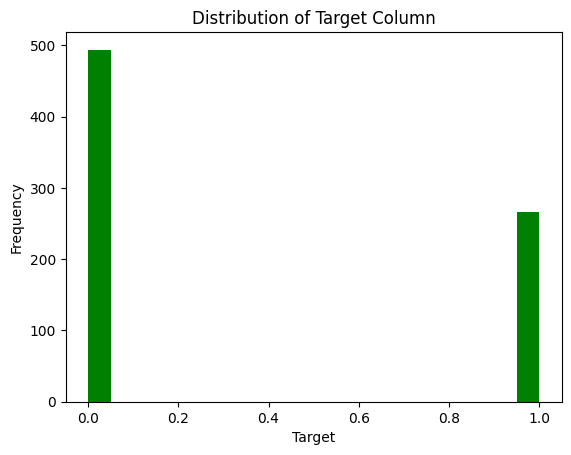

In [12]:
#visualization graphs

#this shows the frequency of target variables present in the dataset

plt.hist(df['target'], bins=20, color='green')
plt.title('Distribution of Target Column')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

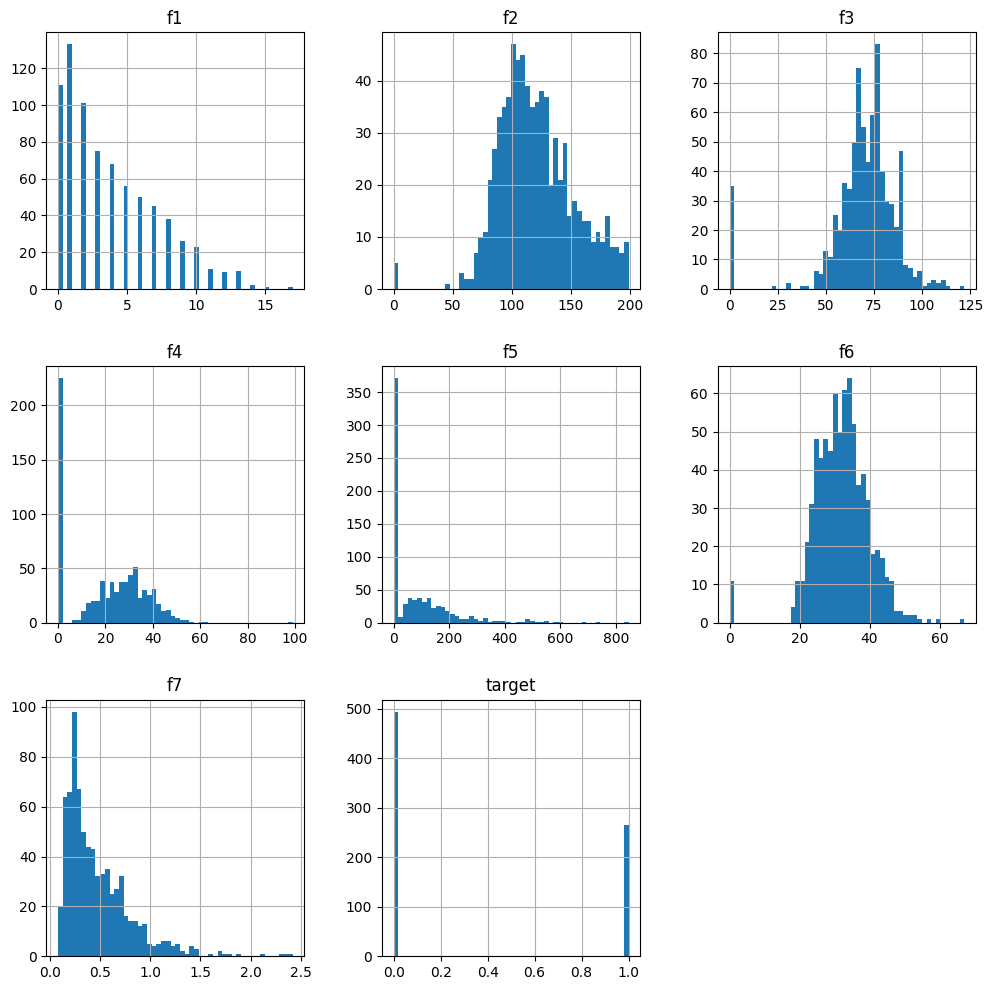

In [13]:
df.hist(bins=50, figsize=(12,12))
plt.show()

<Figure size 1200x600 with 0 Axes>

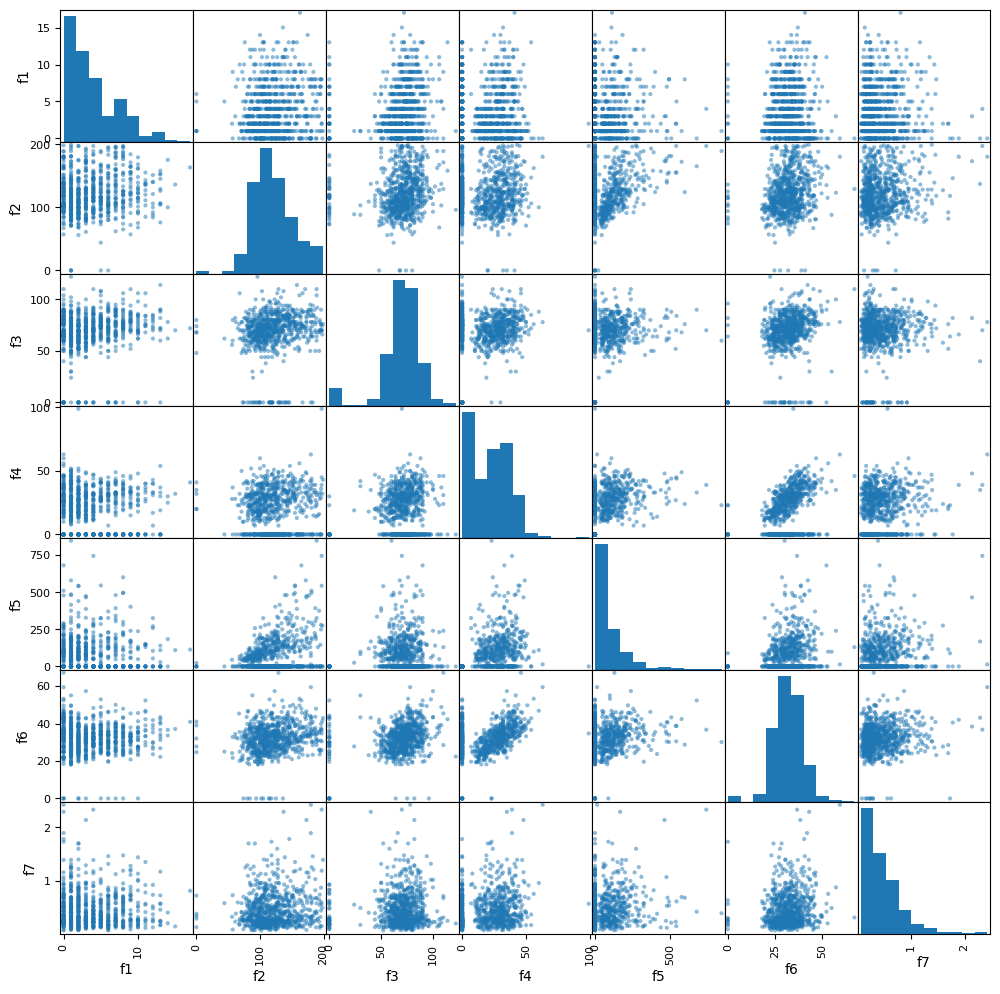

In [14]:
attributes = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
plt.figure(figsize=(12, 6))
scatter_matrix(df[attributes],figsize=(12,12))
plt.show()

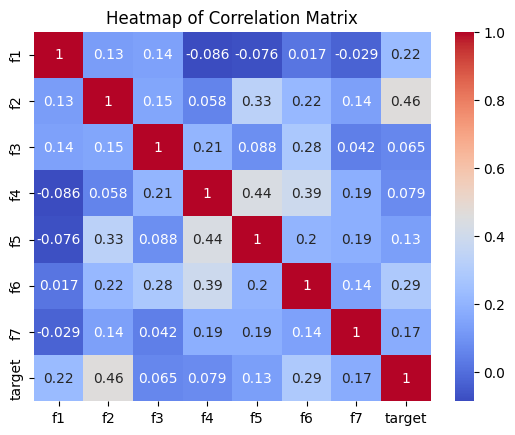

In [15]:
corrx = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'target']].corr()
sea.heatmap(corrx, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [16]:
#preprocessing

In [17]:
def drop_values(df, col):
  Q1 = df[col].quantile(0.25)
  Q2 = df[col].quantile(0.50)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.3 * IQR
  upper_bound = Q3 + 1.3 * IQR
  df = df[(df['f7'] >= lower_bound) & (df['f7'] <= upper_bound)]

list_of_cols = ["f1","f2","f3","f4","f5","f6","f7"]

for str in list_of_cols:
  drop_values(df,str)


In [18]:

n_features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']

sc = StandardScaler()

# Fitting the sc to the numerical features and transforming them
df[n_features] = sc.fit_transform(df[n_features])
print(df)

           f1        f2        f3        f4        f5        f6        f7  \
0    0.644092  0.844637  0.148213  0.908737 -0.694636  0.202839  0.463021   
1   -0.842876 -1.123976 -0.160536  0.532503 -0.694636 -0.683852 -0.368158   
2    1.238879  1.938311 -0.263452 -1.285961 -0.694636 -1.101863  0.598540   
3   -0.842876 -0.998985 -0.160536  0.156269  0.119179 -0.493847 -0.922278   
4   -1.140270  0.500911 -1.498446  0.908737  0.759842  1.406204  5.465156   
..        ...       ...       ...       ...       ...       ...       ...   
755 -0.842876  0.219680  0.971542  1.159559  0.257700  0.570182  1.757975   
756  0.941485  0.500911  1.074458  1.284971 -0.694636  0.000167 -0.247698   
757 -1.140270  0.063441  0.148213 -1.285961 -0.694636  0.544848 -0.648230   
758 -0.842876 -0.467772  0.354045 -1.285961 -0.694636  0.696852 -0.831932   
759  0.644092  2.157046  1.177375 -1.285961 -0.694636  0.443512 -0.587999   

     target  
0         1  
1         0  
2         1  
3         0  
4    

In [19]:
X = df.drop('target', axis=1).values # Features (excluding target column)
y = df['target'].values  # Target variable

X_train, X_test_temp, y_train, y_test_temp = train_test_split(X, y,random_state = 42 ,test_size=0.20)
X_test,X_Validation,y_test,y_Validation = train_test_split(X_test_temp, y_test_temp, random_state = 42 ,test_size=0.50)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(X_Validation.shape)
print(y_train.shape)
print(y_test.shape)
print(y_Validation.shape)

(608, 7)
(76, 7)
(76, 7)
(608,)
(76,)
(76,)


## **BASE SETUP**

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model = NeuralNetwork()

# Print the summary of the model
from torchinfo import summary
print(summary(model, input_size=(1, 7)))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─LeakyReLU: 2-8                    [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─LeakyReLU: 2-11                   [1, 512]                  --
│ 

In [23]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses = []
val_losses = []
train_pred_outside_epoch = []
train_true_outside_epoch = []
val_pred_outside_epoch = []
val_true_outside_epoch = []
train_accuracy = []
val_accuracy = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model.train()  # Set the model to training mode
    running_loss = 0.0
    train_pred_inside_epoch = []
    train_true_inside_epoch = []
    train_accuracy_inside_epoch = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch = train_accuracy_inside_epoch + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch = train_pred_inside_epoch + train_predictions.tolist()
        train_true_inside_epoch = train_true_inside_epoch + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses.append(train_loss)

    train_pred_outside_epoch = train_pred_outside_epoch + train_pred_inside_epoch
    train_true_outside_epoch = train_true_outside_epoch + train_true_inside_epoch

    train_accuracy.append(train_accuracy_inside_epoch/4.0)

    val_pred_inside_epoch = []
    val_true_inside_epoch = []

    val_accuracy_inside_epoch = 0

    # Validationstep
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch = val_accuracy_inside_epoch + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch = val_pred_inside_epoch + val_predictions.tolist()
            val_true_inside_epoch = val_true_inside_epoch + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses.append(val_loss)

    val_pred_outside_epoch = val_pred_outside_epoch + val_pred_inside_epoch
    val_true_outside_epoch = val_true_outside_epoch + val_true_inside_epoch

    val_accuracy.append(val_accuracy_inside_epoch/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch/4.0}, Validation Accuracy : {val_accuracy_inside_epoch/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy[0:10]}")
# print(f"Validation accuracy : {val_accuracy[0:10]}")

# print(f"{len(train_pred_outside_epoch)}")
# print(f"{len(train_true_outside_epoch)}")

epoch : 0 out of 20 : Training Loss is 0.004444024280497902, Validation Loss is 0.03480891648091768, Training Accuracy : 0.6480263157894737, Validation Accuracy : 0.631578947368421 
epoch : 1 out of 20 : Training Loss is 0.004117050453236229, Validation Loss is 0.03142657013315903, Training Accuracy : 0.6480263157894737, Validation Accuracy : 0.631578947368421 
epoch : 2 out of 20 : Training Loss is 0.0037413950225240306, Validation Loss is 0.030433713605529385, Training Accuracy : 0.6480263157894737, Validation Accuracy : 0.631578947368421 
epoch : 3 out of 20 : Training Loss is 0.0035084918827602736, Validation Loss is 0.030086642033175418, Training Accuracy : 0.7154605263157895, Validation Accuracy : 0.736842105263158 
epoch : 4 out of 20 : Training Loss is 0.003382487810756031, Validation Loss is 0.029759311362316732, Training Accuracy : 0.7796052631578948, Validation Accuracy : 0.7236842105263157 
epoch : 5 out of 20 : Training Loss is 0.003310662351156536, Validation Loss is 0.02

In [24]:
#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch = []
test_true_outside_epoch = []
test_loss = 0
model.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch = test_pred_outside_epoch + test_predictions.tolist()
    test_true_outside_epoch = test_true_outside_epoch + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

loss during testing phase : 0.4783425033092499


In [25]:
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")
print(f"time taken during testing dataset evaluation : {test_end_time  - test_start_time }")

Accuracy : 0.75
Precision : 0.5925925925925926
recall : 0.6666666666666666
f1 : 0.627450980392157
time taken during testing dataset evaluation : 0.01053166389465332


In [26]:

model_path = '/content/ml_assignment2_part1.pth'

# Save the model to the specified path
torch.save(model.state_dict(), model_path)


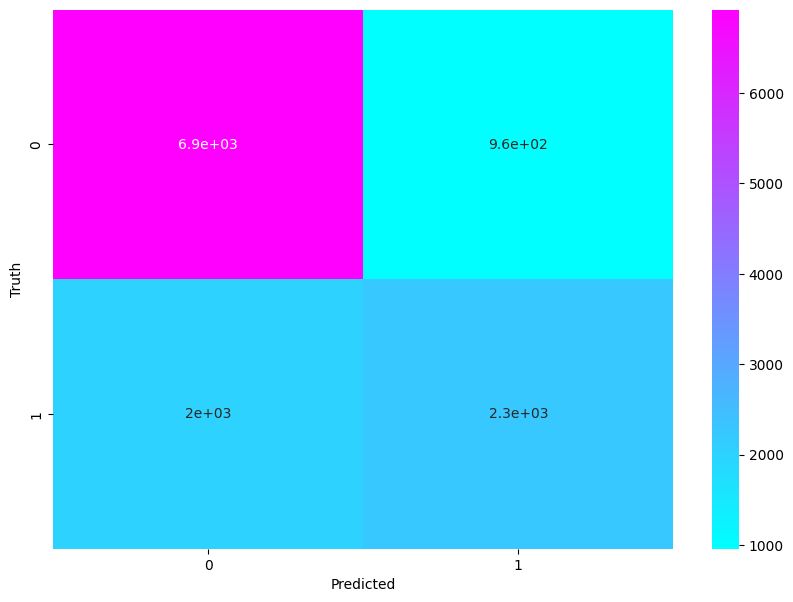

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch, train_pred_outside_epoch)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

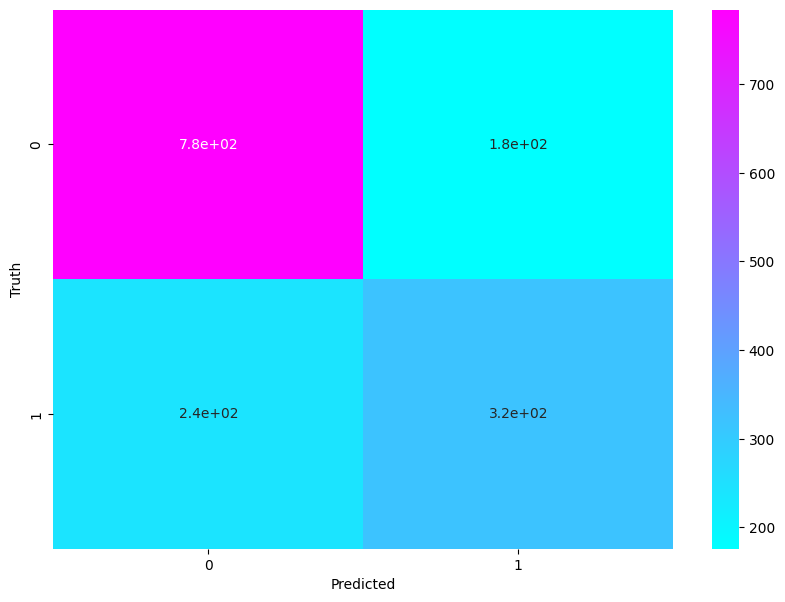

In [29]:
#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch, val_pred_outside_epoch)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

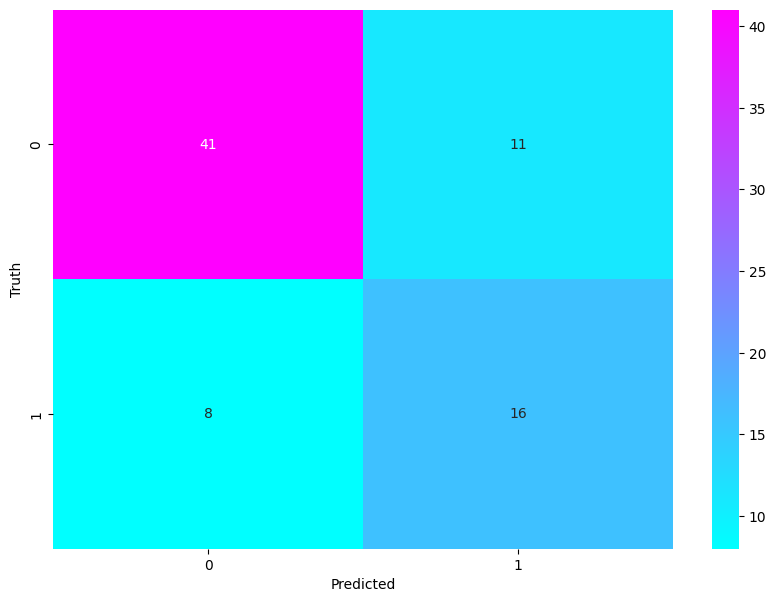

In [30]:
#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch, test_pred_outside_epoch)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

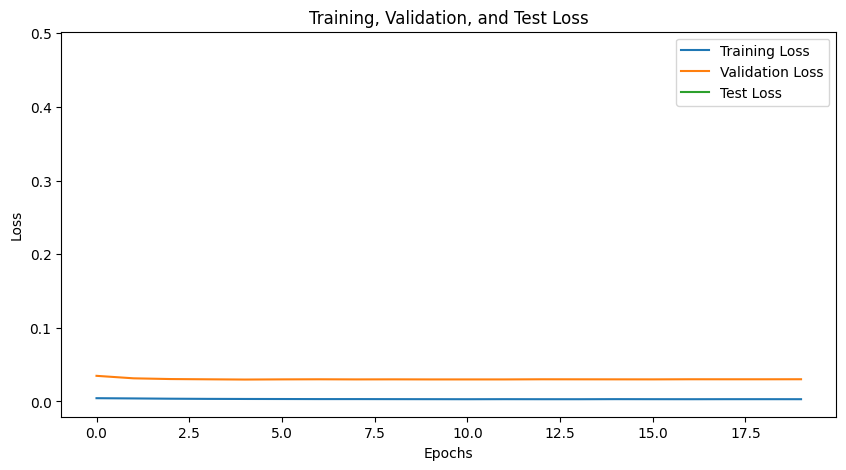

In [31]:
#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

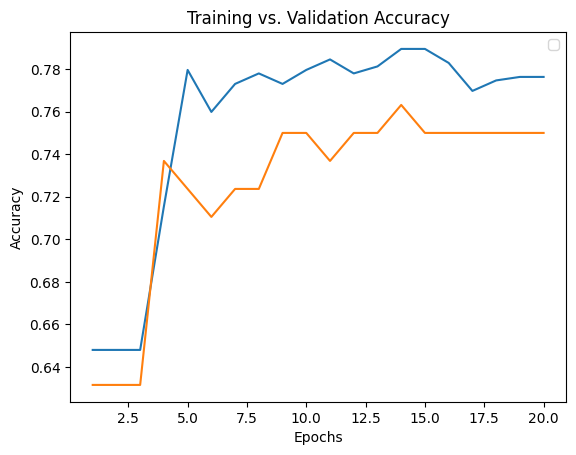

<ipython-input-32-ee6b319ac964>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-32-ee6b319ac964>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


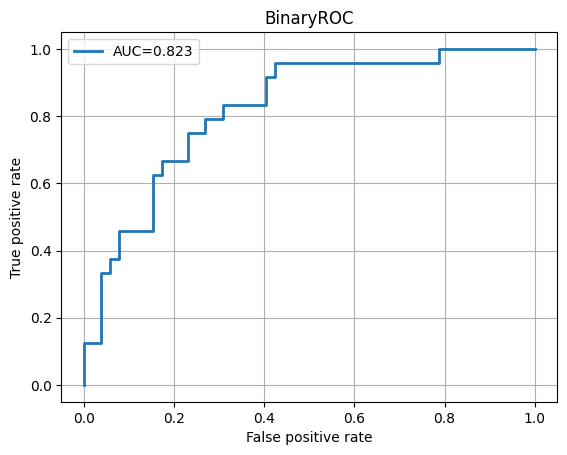

In [32]:
# Accuracy graph
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy)
plt.plot(epochs, val_accuracy)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP 1 : Change dropout rates**

### **CHANGE 1 :** Change dropout rates from 0.1,0.2,0.3,0.4,0.3,0.2,0.1 to 0.4 for all layers.



Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup1_change1             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─LeakyReLU: 2-8                    [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─LeakyReLU: 2-11                   [1, 512]                  --
│ 

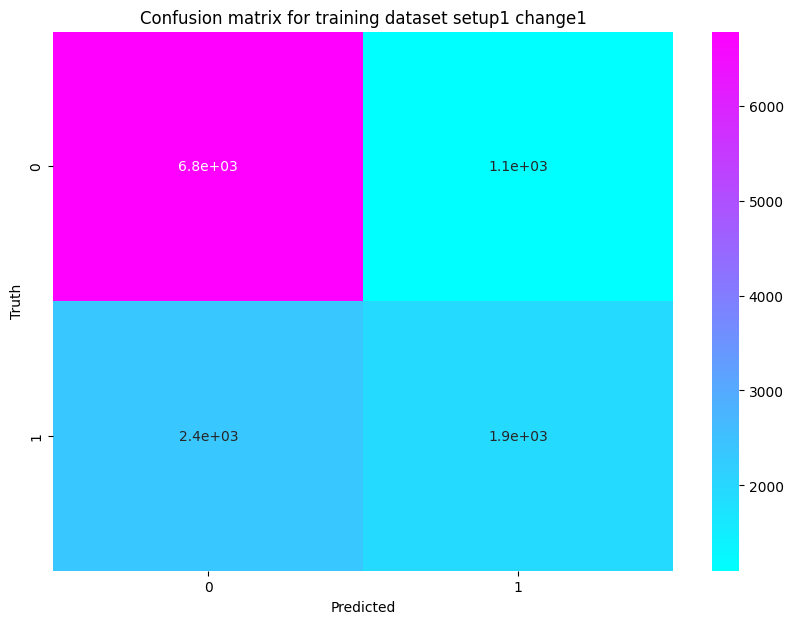

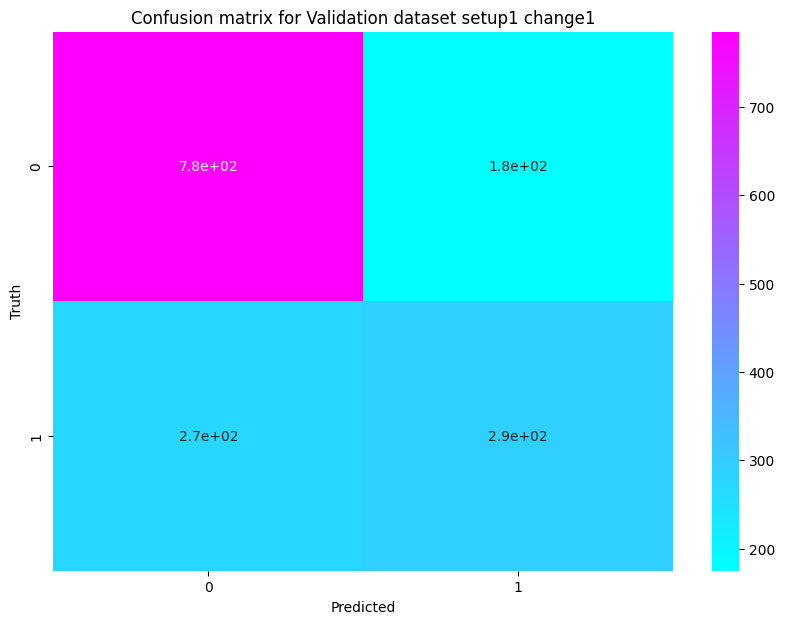

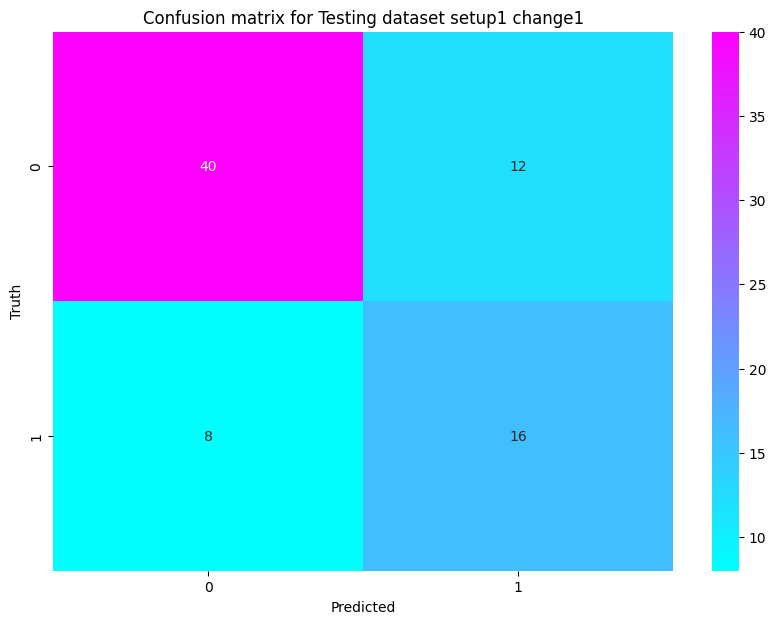

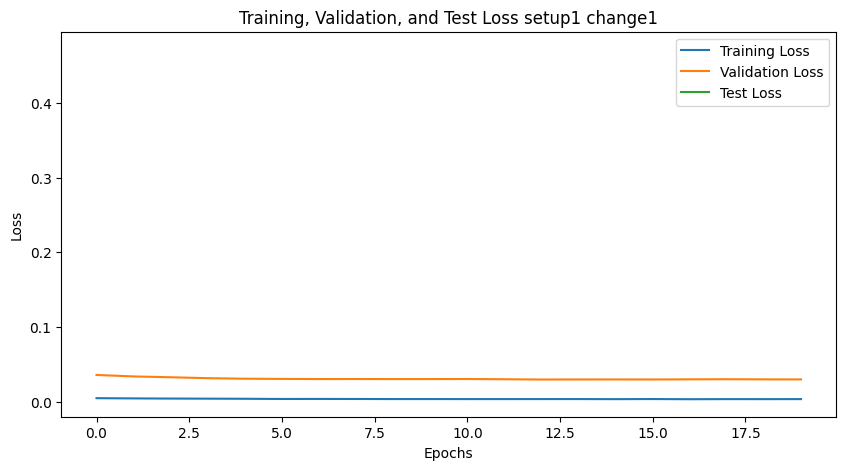

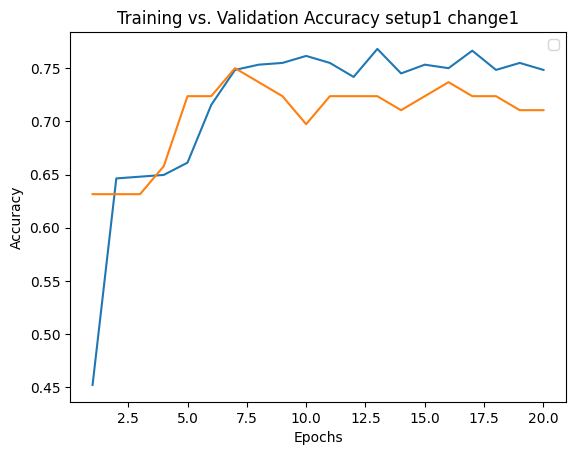

<ipython-input-33-c1e1be6bd6b9>:251: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-33-c1e1be6bd6b9>:253: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


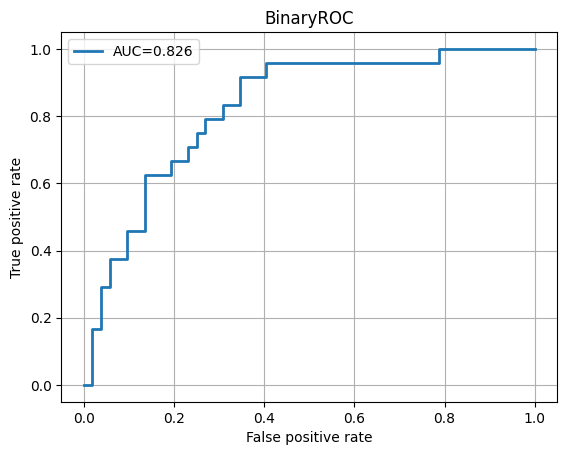

In [33]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_setup1_change1(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup1_change1, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup1_change1 = NeuralNetwork_setup1_change1()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup1_change1, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model_setup1_change1.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_setup1_change1 = []
val_losses_setup1_change1 = []
train_pred_outside_epoch_setup1_change1 = []
train_true_outside_epoch_setup1_change1 = []
val_pred_outside_epoch_setup1_change1 = []
val_true_outside_epoch_setup1_change1 = []
train_accuracy_setup1_change1 = []
val_accuracy_setup1_change1 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup1_change1.train()  # Set the model_setup1_change1 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup1_change1 = []
    train_true_inside_epoch_setup1_change1 = []
    train_accuracy_inside_epoch_setup1_change1 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup1_change1(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup1_change1 = train_accuracy_inside_epoch_setup1_change1 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup1_change1 = train_pred_inside_epoch_setup1_change1 + train_predictions.tolist()
        train_true_inside_epoch_setup1_change1 = train_true_inside_epoch_setup1_change1 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup1_change1.append(train_loss)

    train_pred_outside_epoch_setup1_change1 = train_pred_outside_epoch_setup1_change1 + train_pred_inside_epoch_setup1_change1
    train_true_outside_epoch_setup1_change1 = train_true_outside_epoch_setup1_change1 + train_true_inside_epoch_setup1_change1

    train_accuracy_setup1_change1.append(train_accuracy_inside_epoch_setup1_change1/4.0)

    val_pred_inside_epoch_setup1_change1 = []
    val_true_inside_epoch_setup1_change1 = []

    val_accuracy_inside_epoch_setup1_change1 = 0

    # Validationstep
    model_setup1_change1.eval()  # Set the model_setup1_change1 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup1_change1(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup1_change1 = val_accuracy_inside_epoch_setup1_change1 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup1_change1 = val_pred_inside_epoch_setup1_change1 + val_predictions.tolist()
            val_true_inside_epoch_setup1_change1 = val_true_inside_epoch_setup1_change1 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup1_change1.append(val_loss)

    val_pred_outside_epoch_setup1_change1 = val_pred_outside_epoch_setup1_change1 + val_pred_inside_epoch_setup1_change1
    val_true_outside_epoch_setup1_change1 = val_true_outside_epoch_setup1_change1 + val_true_inside_epoch_setup1_change1

    val_accuracy_setup1_change1.append(val_accuracy_inside_epoch_setup1_change1/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup1_change1/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup1_change1/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup1_change1[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup1_change1[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup1_change1)}")
# print(f"{len(train_true_outside_epoch_setup1_change1)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup1_change1 = []
test_true_outside_epoch_setup1_change1 = []
test_loss = 0
model_setup1_change1.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup1_change1(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup1_change1 = test_pred_outside_epoch_setup1_change1 + test_predictions.tolist()
    test_true_outside_epoch_setup1_change1 = test_true_outside_epoch_setup1_change1 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup1_change1 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup1_change1 : {accuracy_test_setup1_change1}")
print(f"Precision_test_setup1_change1 : {precision}")
print(f"recall_test_setup1_change1 : {recall}")
print(f"f1_test_setup1_change1 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup1_change1 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup1_change1, train_pred_outside_epoch_setup1_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup1 change1")
plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup1_change1, val_pred_outside_epoch_setup1_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup1 change1")
plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup1_change1, test_pred_outside_epoch_setup1_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup1 change1")
plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup1_change1, label='Training Loss')
plt.plot(val_losses_setup1_change1, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup1 change1')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup1_change1) + 1)
plt.plot(epochs, train_accuracy_setup1_change1)
plt.plot(epochs, val_accuracy_setup1_change1)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup1 change1')
plt.legend()
plt.show()
# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP 1 : Change dropout rates**

**CHANGE 2 :** Change dropout rates from 0.1,0.2,0.3,0.4,0.3,0.2,0.1 to 0.5 for all layers.

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup1_change2             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─LeakyReLU: 2-8                    [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─LeakyReLU: 2-11                   [1, 512]                  --
│ 

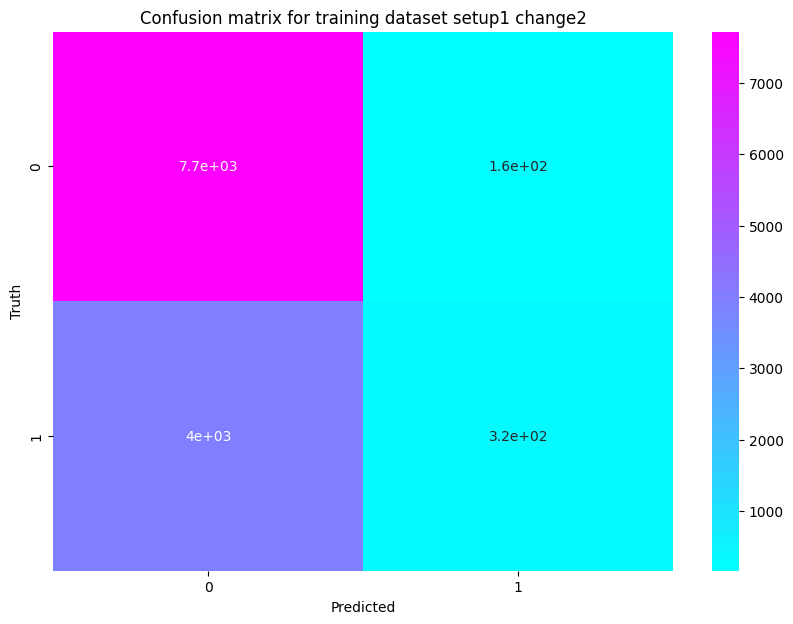

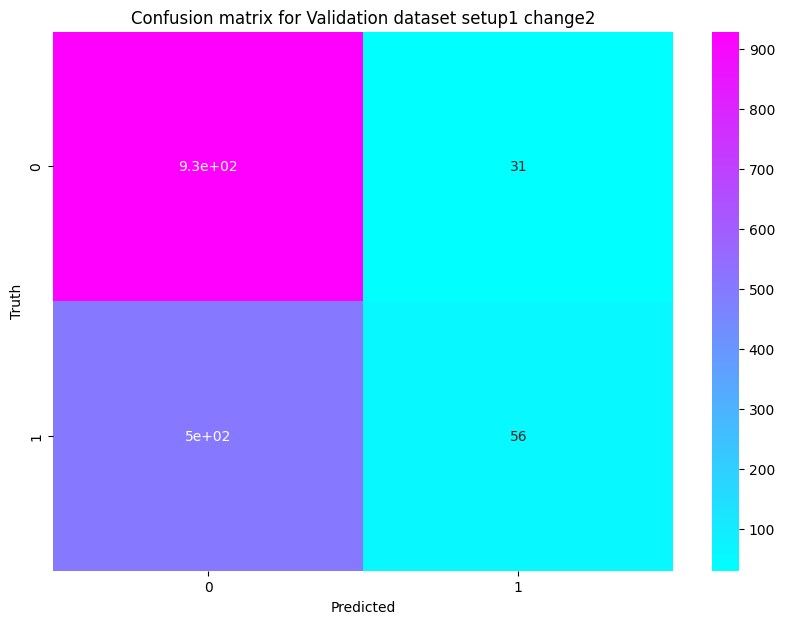

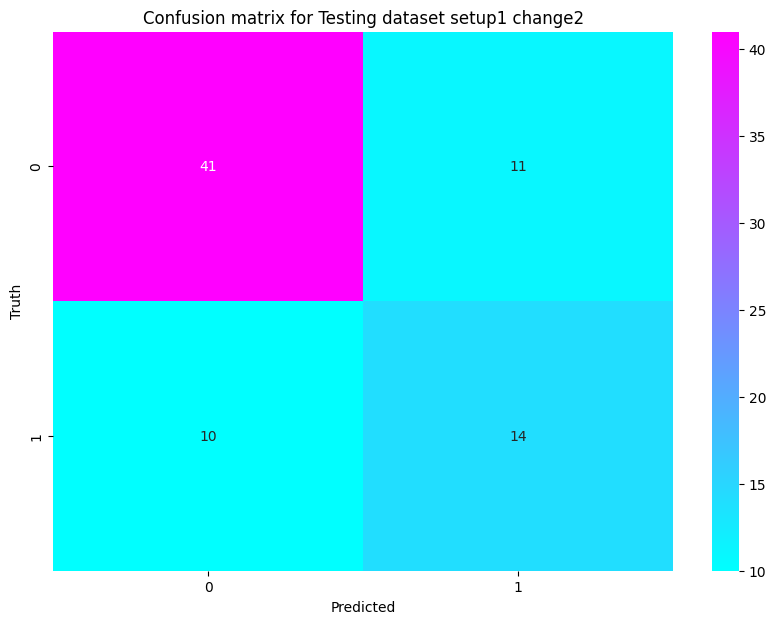

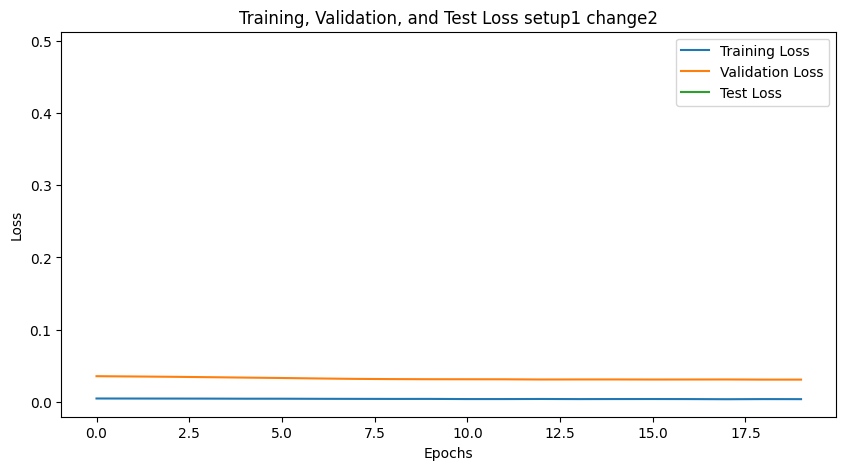

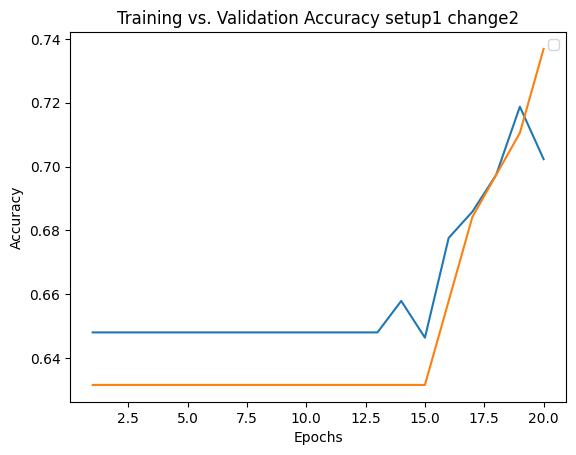

<ipython-input-34-3c8ce45160e3>:255: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-34-3c8ce45160e3>:257: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


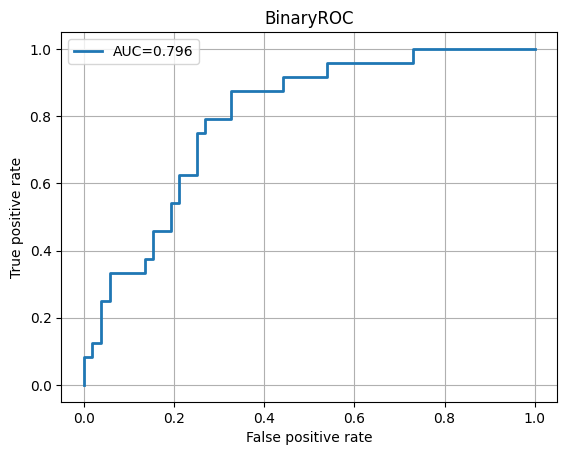

In [34]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_setup1_change2(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup1_change2, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup1_change2 = NeuralNetwork_setup1_change2()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup1_change2, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model_setup1_change2.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_setup1_change2 = []
val_losses_setup1_change2 = []
train_pred_outside_epoch_setup1_change2 = []
train_true_outside_epoch_setup1_change2 = []
val_pred_outside_epoch_setup1_change2 = []
val_true_outside_epoch_setup1_change2 = []
train_accuracy_setup1_change2 = []
val_accuracy_setup1_change2 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup1_change2.train()  # Set the model_setup1_change2 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup1_change2 = []
    train_true_inside_epoch_setup1_change2 = []
    train_accuracy_inside_epoch_setup1_change2 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup1_change2(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup1_change2 = train_accuracy_inside_epoch_setup1_change2 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup1_change2 = train_pred_inside_epoch_setup1_change2 + train_predictions.tolist()
        train_true_inside_epoch_setup1_change2 = train_true_inside_epoch_setup1_change2 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup1_change2.append(train_loss)

    train_pred_outside_epoch_setup1_change2 = train_pred_outside_epoch_setup1_change2 + train_pred_inside_epoch_setup1_change2
    train_true_outside_epoch_setup1_change2 = train_true_outside_epoch_setup1_change2 + train_true_inside_epoch_setup1_change2

    train_accuracy_setup1_change2.append(train_accuracy_inside_epoch_setup1_change2/4.0)

    val_pred_inside_epoch_setup1_change2 = []
    val_true_inside_epoch_setup1_change2 = []

    val_accuracy_inside_epoch_setup1_change2 = 0

    # Validationstep
    model_setup1_change2.eval()  # Set the model_setup1_change2 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup1_change2(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup1_change2 = val_accuracy_inside_epoch_setup1_change2 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup1_change2 = val_pred_inside_epoch_setup1_change2 + val_predictions.tolist()
            val_true_inside_epoch_setup1_change2 = val_true_inside_epoch_setup1_change2 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup1_change2.append(val_loss)

    val_pred_outside_epoch_setup1_change2 = val_pred_outside_epoch_setup1_change2 + val_pred_inside_epoch_setup1_change2
    val_true_outside_epoch_setup1_change2 = val_true_outside_epoch_setup1_change2 + val_true_inside_epoch_setup1_change2

    val_accuracy_setup1_change2.append(val_accuracy_inside_epoch_setup1_change2/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup1_change2/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup1_change2/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup1_change2[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup1_change2[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup1_change2)}")
# print(f"{len(train_true_outside_epoch_setup1_change2)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup1_change2 = []
test_true_outside_epoch_setup1_change2 = []
test_loss = 0
model_setup1_change2.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup1_change2(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup1_change2 = test_pred_outside_epoch_setup1_change2 + test_predictions.tolist()
    test_true_outside_epoch_setup1_change2 = test_true_outside_epoch_setup1_change2 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup1_change2 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup1_change2 : {accuracy_test_setup1_change2}")
print(f"Precision_test_setup1_change2 : {precision}")
print(f"recall_test_setup1_change2 : {recall}")
print(f"f1_test_setup1_change2 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup1_change2 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup1_change2, train_pred_outside_epoch_setup1_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup1 change2")

plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup1_change2, val_pred_outside_epoch_setup1_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup1 change2")

plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup1_change2, test_pred_outside_epoch_setup1_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup1 change2")

plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup1_change2, label='Training Loss')
plt.plot(val_losses_setup1_change2, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup1 change2')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup1_change2) + 1)
plt.plot(epochs, train_accuracy_setup1_change2)
plt.plot(epochs, val_accuracy_setup1_change2)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup1 change2')
plt.legend()
plt.show()

# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP 1 : Change dropout rates**

**CHANGE 3 :** Change dropout rates from 0.1,0.2,0.3,0.4,0.3,0.2,0.1 to 0.6 for all layers.

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup1_change3             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─LeakyReLU: 2-8                    [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─LeakyReLU: 2-11                   [1, 512]                  --
│ 

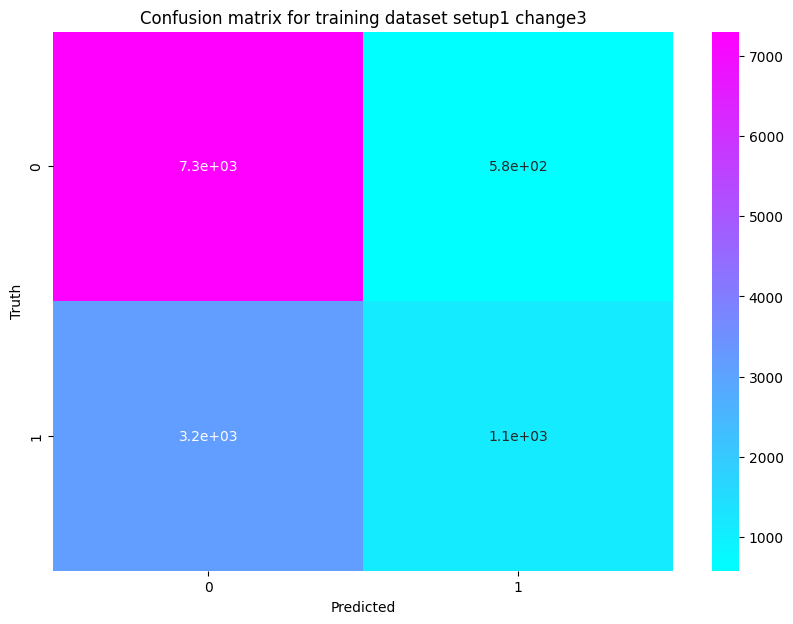

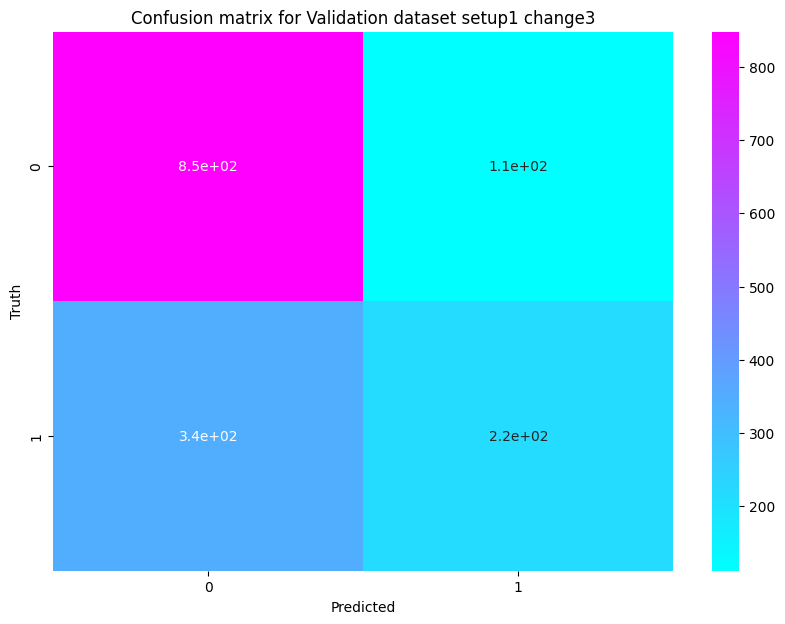

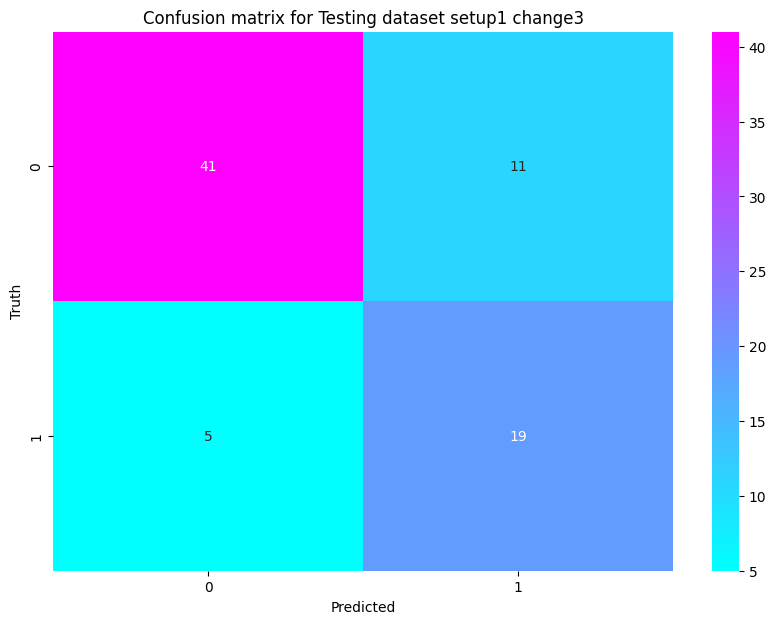

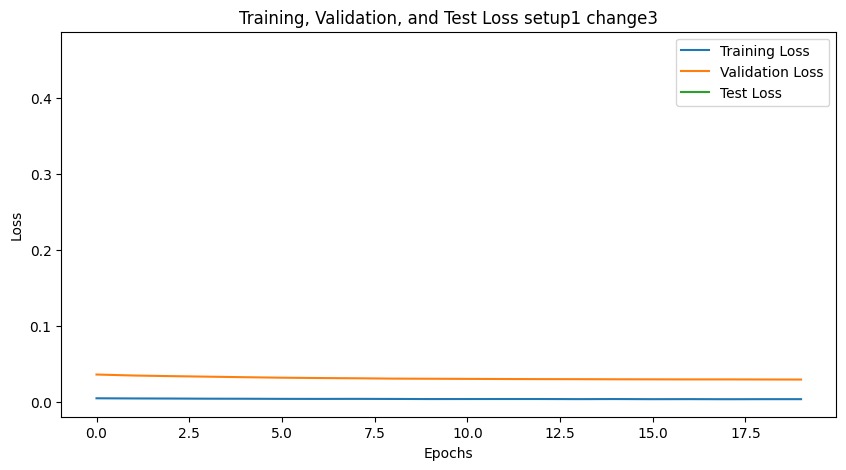

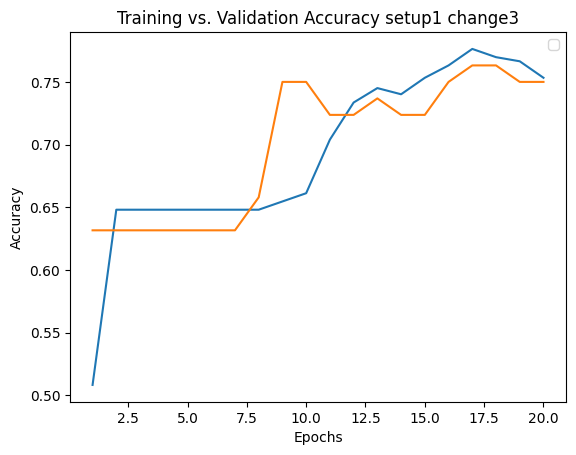

<ipython-input-35-6f74cad4aa43>:254: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-35-6f74cad4aa43>:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


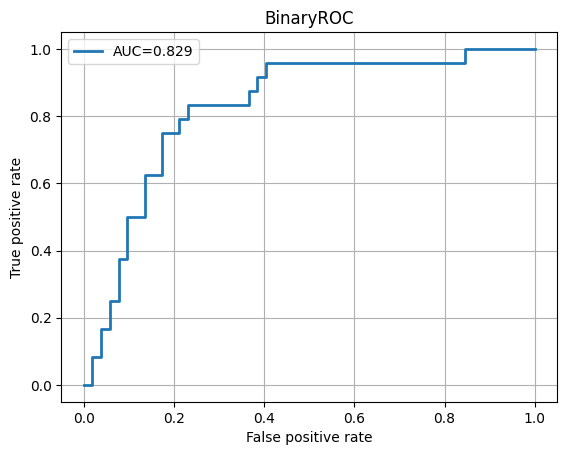

In [35]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_setup1_change3(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup1_change3, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.6),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup1_change3 = NeuralNetwork_setup1_change3()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup1_change3, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model_setup1_change3.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_setup1_change3 = []
val_losses_setup1_change3 = []
train_pred_outside_epoch_setup1_change3 = []
train_true_outside_epoch_setup1_change3 = []
val_pred_outside_epoch_setup1_change3 = []
val_true_outside_epoch_setup1_change3 = []
train_accuracy_setup1_change3 = []
val_accuracy_setup1_change3 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup1_change3.train()  # Set the model_setup1_change3 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup1_change3 = []
    train_true_inside_epoch_setup1_change3 = []
    train_accuracy_inside_epoch_setup1_change3 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup1_change3(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup1_change3 = train_accuracy_inside_epoch_setup1_change3 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup1_change3 = train_pred_inside_epoch_setup1_change3 + train_predictions.tolist()
        train_true_inside_epoch_setup1_change3 = train_true_inside_epoch_setup1_change3 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup1_change3.append(train_loss)

    train_pred_outside_epoch_setup1_change3 = train_pred_outside_epoch_setup1_change3 + train_pred_inside_epoch_setup1_change3
    train_true_outside_epoch_setup1_change3 = train_true_outside_epoch_setup1_change3 + train_true_inside_epoch_setup1_change3

    train_accuracy_setup1_change3.append(train_accuracy_inside_epoch_setup1_change3/4.0)

    val_pred_inside_epoch_setup1_change3 = []
    val_true_inside_epoch_setup1_change3 = []

    val_accuracy_inside_epoch_setup1_change3 = 0

    # Validationstep
    model_setup1_change3.eval()  # Set the model_setup1_change3 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup1_change3(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup1_change3 = val_accuracy_inside_epoch_setup1_change3 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup1_change3 = val_pred_inside_epoch_setup1_change3 + val_predictions.tolist()
            val_true_inside_epoch_setup1_change3 = val_true_inside_epoch_setup1_change3 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup1_change3.append(val_loss)

    val_pred_outside_epoch_setup1_change3 = val_pred_outside_epoch_setup1_change3 + val_pred_inside_epoch_setup1_change3
    val_true_outside_epoch_setup1_change3 = val_true_outside_epoch_setup1_change3 + val_true_inside_epoch_setup1_change3

    val_accuracy_setup1_change3.append(val_accuracy_inside_epoch_setup1_change3/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup1_change3/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup1_change3/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup1_change3[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup1_change3[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup1_change3)}")
# print(f"{len(train_true_outside_epoch_setup1_change3)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup1_change3 = []
test_true_outside_epoch_setup1_change3 = []
test_loss = 0
model_setup1_change3.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup1_change3(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup1_change3 = test_pred_outside_epoch_setup1_change3 + test_predictions.tolist()
    test_true_outside_epoch_setup1_change3 = test_true_outside_epoch_setup1_change3 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup1_change3 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup1_change3 : {accuracy_test_setup1_change3}")
print(f"Precision_test_setup1_change3 : {precision}")
print(f"recall_test_setup1_change3 : {recall}")
print(f"f1_test_setup1_change3 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup1_change3 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup1_change3, train_pred_outside_epoch_setup1_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup1 change3")

plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup1_change3, val_pred_outside_epoch_setup1_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup1 change3")

plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup1_change3, test_pred_outside_epoch_setup1_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup1 change3")
plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup1_change3, label='Training Loss')
plt.plot(val_losses_setup1_change3, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup1 change3')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup1_change3) + 1)
plt.plot(epochs, train_accuracy_setup1_change3)
plt.plot(epochs, val_accuracy_setup1_change3)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup1 change3')
plt.legend()
plt.show()

# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)


# **PART 2 SETUP 2 : change optimizer**

**change 1 :**change from Adagrad to Adam

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup2_change1             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─LeakyReLU: 2-8                    [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─LeakyReLU: 2-11                   [1, 512]                  --
│ 

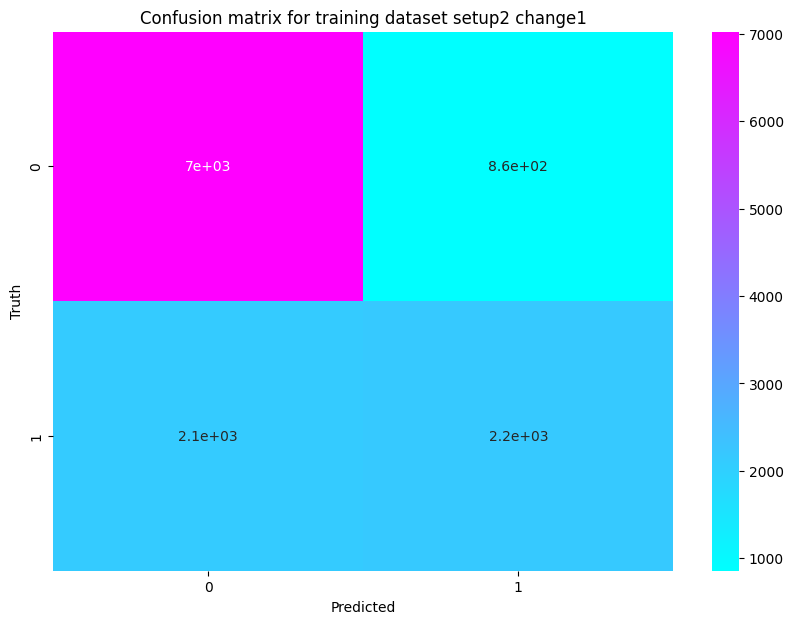

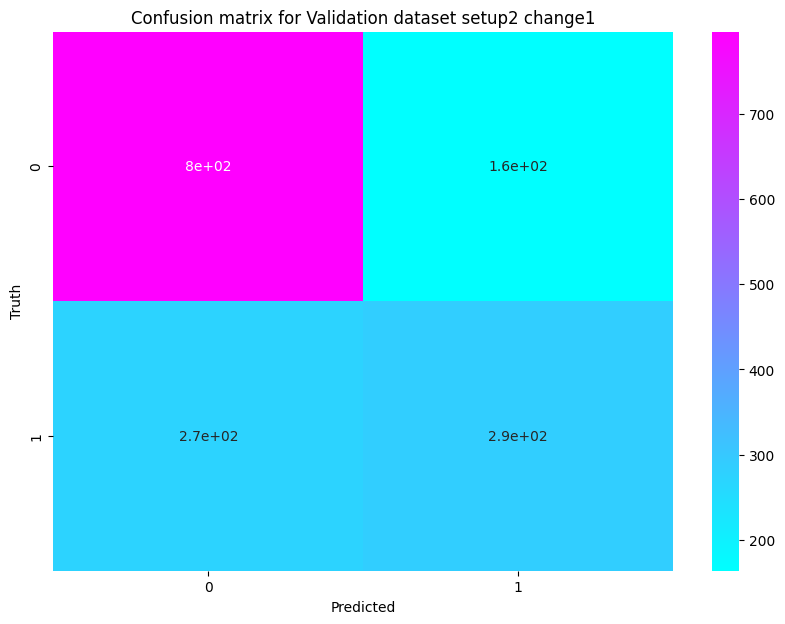

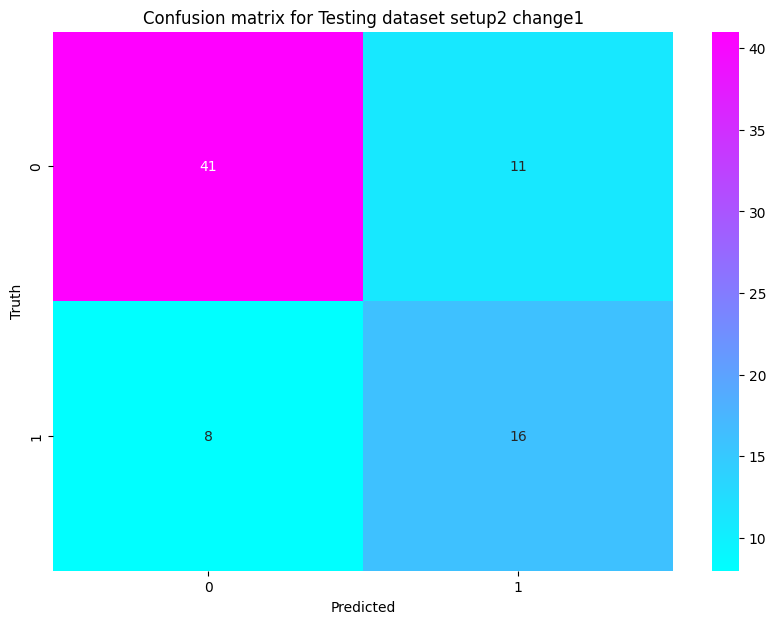

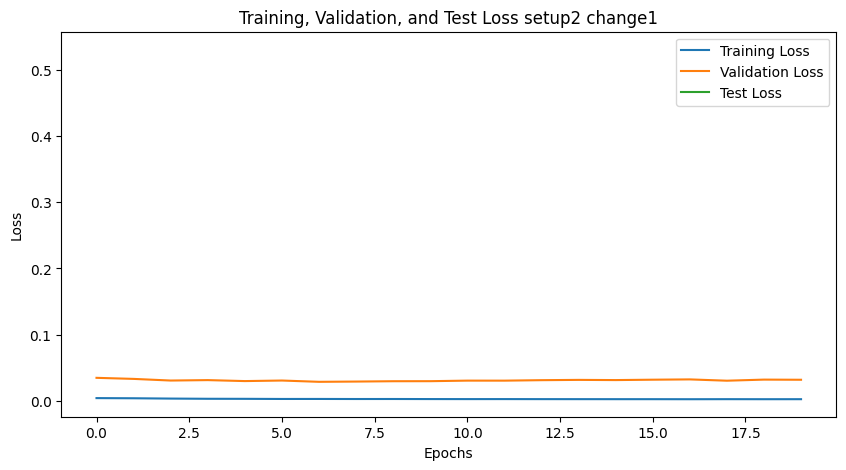

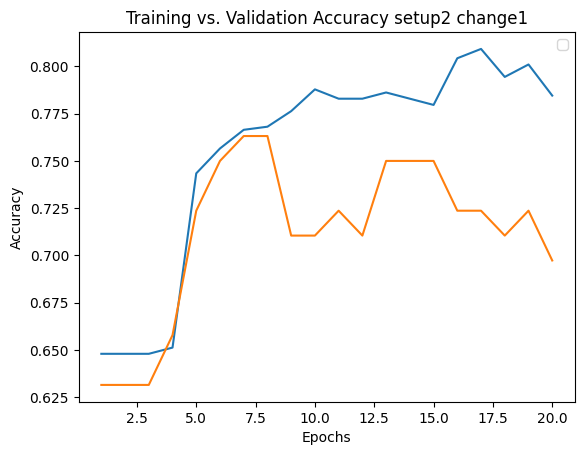

<ipython-input-36-ace9c4cf4543>:254: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-36-ace9c4cf4543>:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


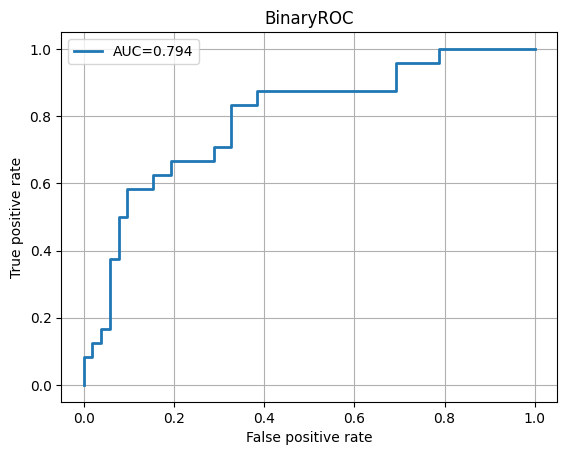

In [36]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_setup2_change1(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup2_change1, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup2_change1 = NeuralNetwork_setup2_change1()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup2_change1, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model_setup2_change1.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_setup2_change1 = []
val_losses_setup2_change1 = []
train_pred_outside_epoch_setup2_change1 = []
train_true_outside_epoch_setup2_change1 = []
val_pred_outside_epoch_setup2_change1 = []
val_true_outside_epoch_setup2_change1 = []
train_accuracy_setup2_change1 = []
val_accuracy_setup2_change1 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup2_change1.train()  # Set the model_setup2_change1 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup2_change1 = []
    train_true_inside_epoch_setup2_change1 = []
    train_accuracy_inside_epoch_setup2_change1 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup2_change1(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup2_change1 = train_accuracy_inside_epoch_setup2_change1 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup2_change1 = train_pred_inside_epoch_setup2_change1 + train_predictions.tolist()
        train_true_inside_epoch_setup2_change1 = train_true_inside_epoch_setup2_change1 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup2_change1.append(train_loss)

    train_pred_outside_epoch_setup2_change1 = train_pred_outside_epoch_setup2_change1 + train_pred_inside_epoch_setup2_change1
    train_true_outside_epoch_setup2_change1 = train_true_outside_epoch_setup2_change1 + train_true_inside_epoch_setup2_change1

    train_accuracy_setup2_change1.append(train_accuracy_inside_epoch_setup2_change1/4.0)

    val_pred_inside_epoch_setup2_change1 = []
    val_true_inside_epoch_setup2_change1 = []

    val_accuracy_inside_epoch_setup2_change1 = 0

    # Validationstep
    model_setup2_change1.eval()  # Set the model_setup2_change1 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup2_change1(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup2_change1 = val_accuracy_inside_epoch_setup2_change1 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup2_change1 = val_pred_inside_epoch_setup2_change1 + val_predictions.tolist()
            val_true_inside_epoch_setup2_change1 = val_true_inside_epoch_setup2_change1 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup2_change1.append(val_loss)

    val_pred_outside_epoch_setup2_change1 = val_pred_outside_epoch_setup2_change1 + val_pred_inside_epoch_setup2_change1
    val_true_outside_epoch_setup2_change1 = val_true_outside_epoch_setup2_change1 + val_true_inside_epoch_setup2_change1

    val_accuracy_setup2_change1.append(val_accuracy_inside_epoch_setup2_change1/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup2_change1/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup2_change1/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup2_change1[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup2_change1[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup2_change1)}")
# print(f"{len(train_true_outside_epoch_setup2_change1)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup2_change1 = []
test_true_outside_epoch_setup2_change1 = []
test_loss = 0
model_setup2_change1.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup2_change1(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup2_change1 = test_pred_outside_epoch_setup2_change1 + test_predictions.tolist()
    test_true_outside_epoch_setup2_change1 = test_true_outside_epoch_setup2_change1 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup2_change1 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup2_change1 : {accuracy_test_setup2_change1}")
print(f"Precision_test_setup2_change1 : {precision}")
print(f"recall_test_setup2_change1 : {recall}")
print(f"f1_test_setup2_change1 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup2_change1 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup2_change1, train_pred_outside_epoch_setup2_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup2 change1")
plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup2_change1, val_pred_outside_epoch_setup2_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup2 change1")

plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup2_change1, test_pred_outside_epoch_setup2_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup2 change1")

plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup2_change1, label='Training Loss')
plt.plot(val_losses_setup2_change1, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup2 change1')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup2_change1) + 1)
plt.plot(epochs, train_accuracy_setup2_change1)
plt.plot(epochs, val_accuracy_setup2_change1)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup2 change1')
plt.legend()
plt.show()

# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP 2 : change optimizer**

**change 2: ** change from Adagrad to Adadelta

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup2_change2             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─LeakyReLU: 2-8                    [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─LeakyReLU: 2-11                   [1, 512]                  --
│ 

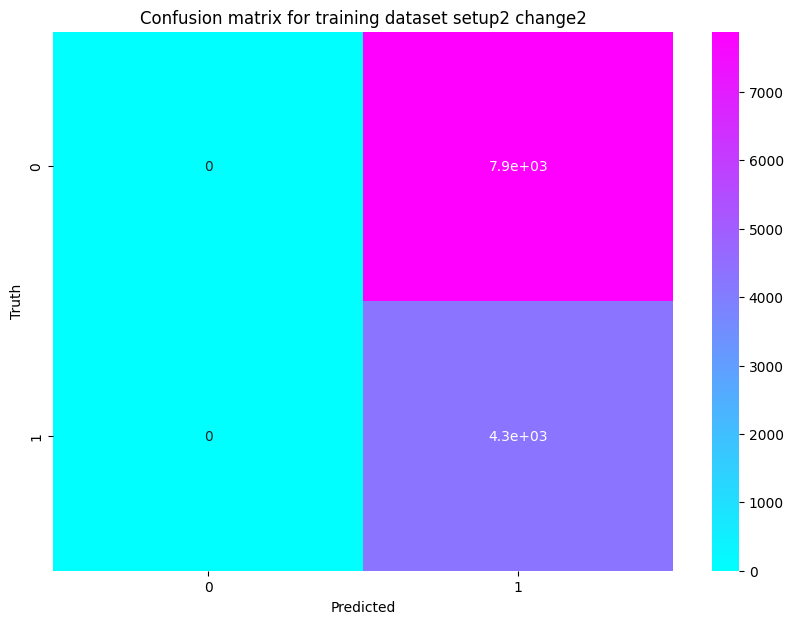

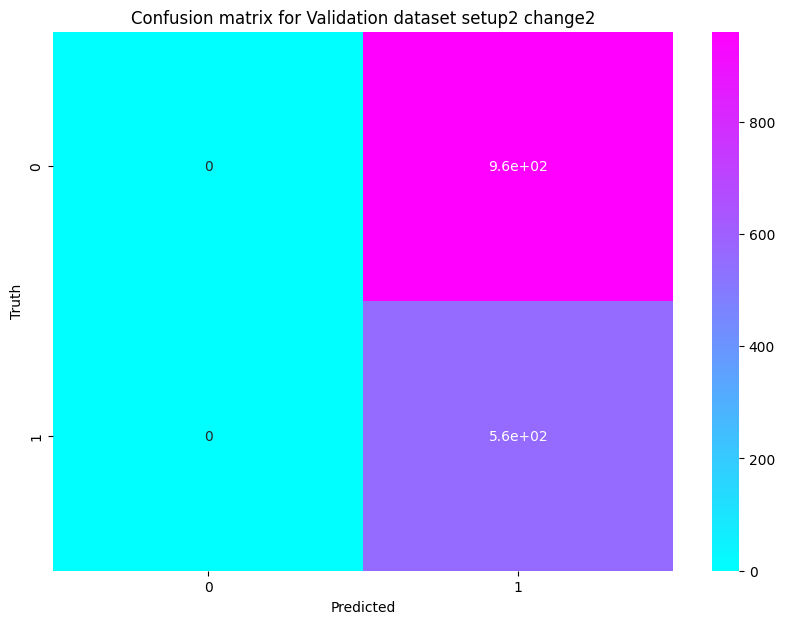

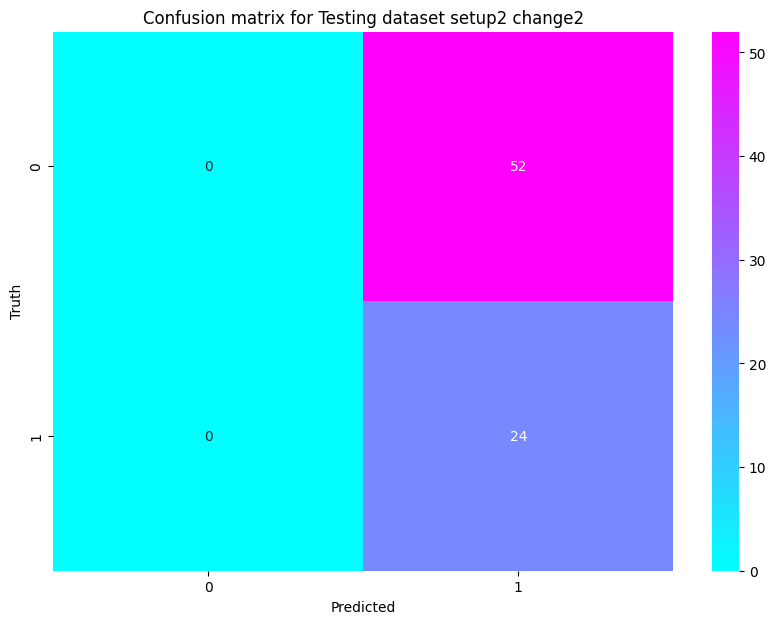

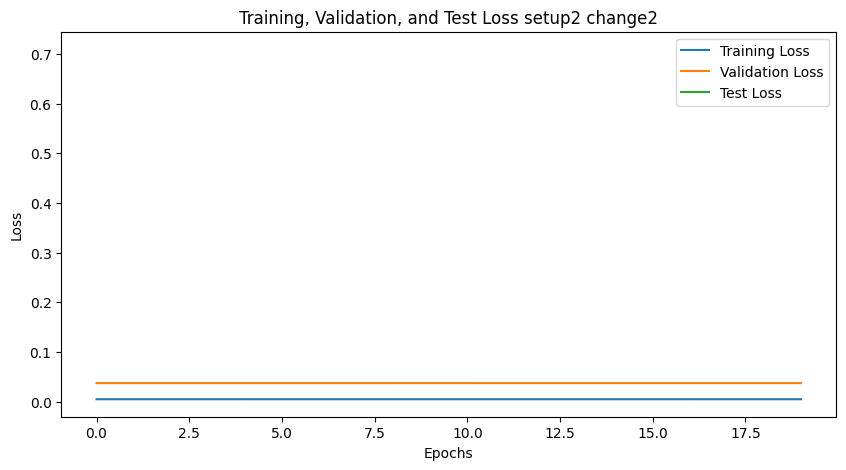

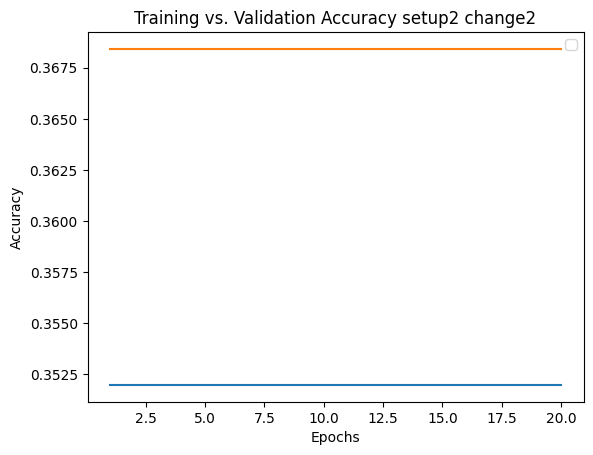

<ipython-input-37-81d8b6dcd166>:255: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-37-81d8b6dcd166>:257: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


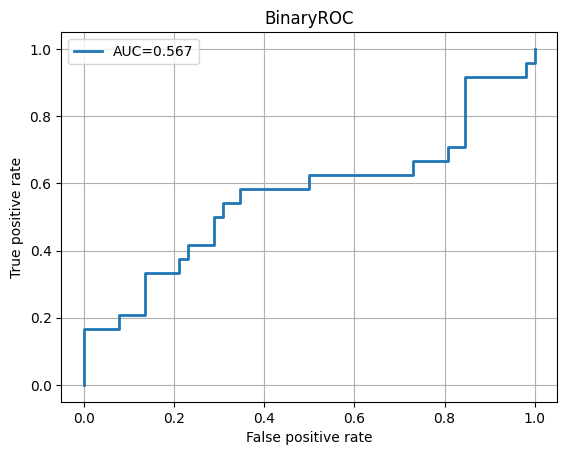

In [37]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_setup2_change2(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup2_change2, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup2_change2 = NeuralNetwork_setup2_change2()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup2_change2, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adadelta(model_setup2_change2.parameters(), lr=0.002) # optimiser = Adadelta, learning rate = 0.002
train_losses_setup2_change2 = []
val_losses_setup2_change2 = []
train_pred_outside_epoch_setup2_change2 = []
train_true_outside_epoch_setup2_change2 = []
val_pred_outside_epoch_setup2_change2 = []
val_true_outside_epoch_setup2_change2 = []
train_accuracy_setup2_change2 = []
val_accuracy_setup2_change2 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup2_change2.train()  # Set the model_setup2_change2 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup2_change2 = []
    train_true_inside_epoch_setup2_change2 = []
    train_accuracy_inside_epoch_setup2_change2 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup2_change2(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup2_change2 = train_accuracy_inside_epoch_setup2_change2 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup2_change2 = train_pred_inside_epoch_setup2_change2 + train_predictions.tolist()
        train_true_inside_epoch_setup2_change2 = train_true_inside_epoch_setup2_change2 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup2_change2.append(train_loss)

    train_pred_outside_epoch_setup2_change2 = train_pred_outside_epoch_setup2_change2 + train_pred_inside_epoch_setup2_change2
    train_true_outside_epoch_setup2_change2 = train_true_outside_epoch_setup2_change2 + train_true_inside_epoch_setup2_change2

    train_accuracy_setup2_change2.append(train_accuracy_inside_epoch_setup2_change2/4.0)

    val_pred_inside_epoch_setup2_change2 = []
    val_true_inside_epoch_setup2_change2 = []

    val_accuracy_inside_epoch_setup2_change2 = 0

    # Validationstep
    model_setup2_change2.eval()  # Set the model_setup2_change2 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup2_change2(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup2_change2 = val_accuracy_inside_epoch_setup2_change2 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup2_change2 = val_pred_inside_epoch_setup2_change2 + val_predictions.tolist()
            val_true_inside_epoch_setup2_change2 = val_true_inside_epoch_setup2_change2 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup2_change2.append(val_loss)

    val_pred_outside_epoch_setup2_change2 = val_pred_outside_epoch_setup2_change2 + val_pred_inside_epoch_setup2_change2
    val_true_outside_epoch_setup2_change2 = val_true_outside_epoch_setup2_change2 + val_true_inside_epoch_setup2_change2

    val_accuracy_setup2_change2.append(val_accuracy_inside_epoch_setup2_change2/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup2_change2/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup2_change2/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup2_change2[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup2_change2[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup2_change2)}")
# print(f"{len(train_true_outside_epoch_setup2_change2)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup2_change2 = []
test_true_outside_epoch_setup2_change2 = []
test_loss = 0
model_setup2_change2.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup2_change2(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup2_change2 = test_pred_outside_epoch_setup2_change2 + test_predictions.tolist()
    test_true_outside_epoch_setup2_change2 = test_true_outside_epoch_setup2_change2 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup2_change2 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup2_change2 : {accuracy_test_setup2_change2}")
print(f"Precision_test_setup2_change2 : {precision}")
print(f"recall_test_setup2_change2 : {recall}")
print(f"f1_test_setup2_change2 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup2_change2 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup2_change2, train_pred_outside_epoch_setup2_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup2 change2")

plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup2_change2, val_pred_outside_epoch_setup2_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup2 change2")

plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup2_change2, test_pred_outside_epoch_setup2_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup2 change2")

plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup2_change2, label='Training Loss')
plt.plot(val_losses_setup2_change2, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup2 change2')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup2_change2) + 1)
plt.plot(epochs, train_accuracy_setup2_change2)
plt.plot(epochs, val_accuracy_setup2_change2)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup2 change2')
plt.legend()
plt.show()

# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP 2 : change optimizer**

**change 3 : **change from Adagrad to SGD

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup2_change3             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─LeakyReLU: 2-8                    [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─LeakyReLU: 2-11                   [1, 512]                  --
│ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


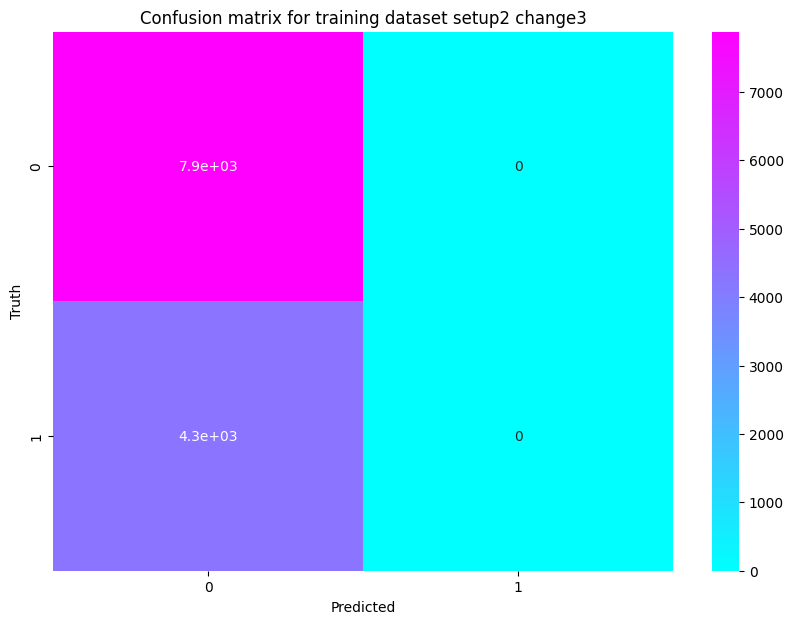

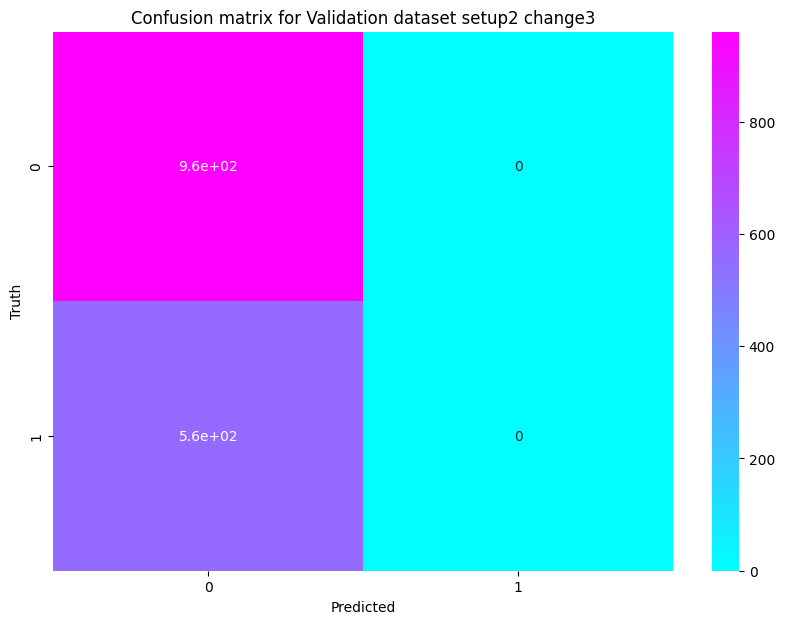

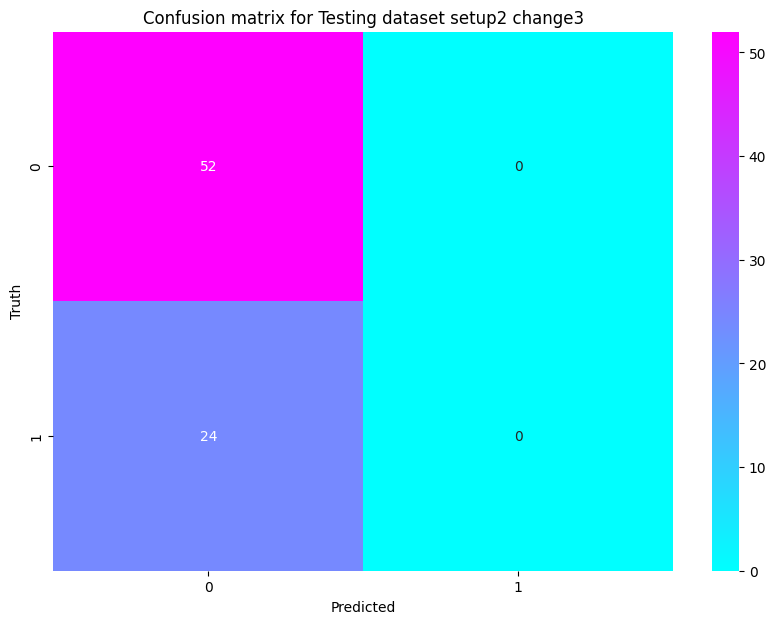

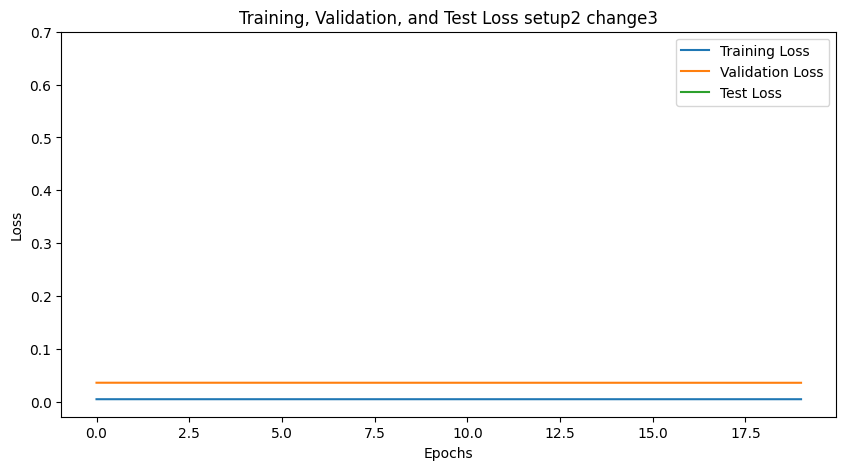

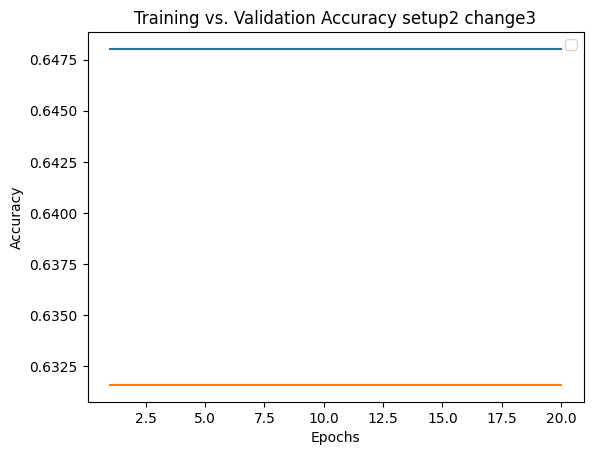

<ipython-input-38-ed3c7b93efb5>:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-38-ed3c7b93efb5>:258: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


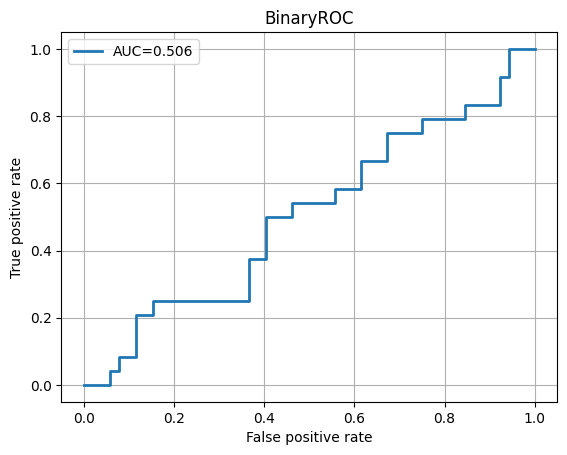

In [38]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_setup2_change3(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup2_change3, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup2_change3 = NeuralNetwork_setup2_change3()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup2_change3, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model_setup2_change3.parameters(), lr=0.002) # optimiser = SGD, learning rate = 0.002
train_losses_setup2_change3 = []
val_losses_setup2_change3 = []
train_pred_outside_epoch_setup2_change3 = []
train_true_outside_epoch_setup2_change3 = []
val_pred_outside_epoch_setup2_change3 = []
val_true_outside_epoch_setup2_change3 = []
train_accuracy_setup2_change3 = []
val_accuracy_setup2_change3 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup2_change3.train()  # Set the model_setup2_change3 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup2_change3 = []
    train_true_inside_epoch_setup2_change3 = []
    train_accuracy_inside_epoch_setup2_change3 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup2_change3(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup2_change3 = train_accuracy_inside_epoch_setup2_change3 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup2_change3 = train_pred_inside_epoch_setup2_change3 + train_predictions.tolist()
        train_true_inside_epoch_setup2_change3 = train_true_inside_epoch_setup2_change3 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup2_change3.append(train_loss)

    train_pred_outside_epoch_setup2_change3 = train_pred_outside_epoch_setup2_change3 + train_pred_inside_epoch_setup2_change3
    train_true_outside_epoch_setup2_change3 = train_true_outside_epoch_setup2_change3 + train_true_inside_epoch_setup2_change3

    train_accuracy_setup2_change3.append(train_accuracy_inside_epoch_setup2_change3/4.0)

    val_pred_inside_epoch_setup2_change3 = []
    val_true_inside_epoch_setup2_change3 = []

    val_accuracy_inside_epoch_setup2_change3 = 0

    # Validationstep
    model_setup2_change3.eval()  # Set the model_setup2_change3 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup2_change3(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup2_change3 = val_accuracy_inside_epoch_setup2_change3 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup2_change3 = val_pred_inside_epoch_setup2_change3 + val_predictions.tolist()
            val_true_inside_epoch_setup2_change3 = val_true_inside_epoch_setup2_change3 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup2_change3.append(val_loss)

    val_pred_outside_epoch_setup2_change3 = val_pred_outside_epoch_setup2_change3 + val_pred_inside_epoch_setup2_change3
    val_true_outside_epoch_setup2_change3 = val_true_outside_epoch_setup2_change3 + val_true_inside_epoch_setup2_change3

    val_accuracy_setup2_change3.append(val_accuracy_inside_epoch_setup2_change3/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup2_change3/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup2_change3/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup2_change3[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup2_change3[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup2_change3)}")
# print(f"{len(train_true_outside_epoch_setup2_change3)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup2_change3 = []
test_true_outside_epoch_setup2_change3 = []
test_loss = 0
model_setup2_change3.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup2_change3(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup2_change3 = test_pred_outside_epoch_setup2_change3 + test_predictions.tolist()
    test_true_outside_epoch_setup2_change3 = test_true_outside_epoch_setup2_change3 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup2_change3 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup2_change3 : {accuracy_test_setup2_change3}")
print(f"Precision_test_setup2_change3 : {precision}")
print(f"recall_test_setup2_change3 : {recall}")
print(f"f1_test_setup2_change3 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup2_change3 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup2_change3, train_pred_outside_epoch_setup2_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup2 change3")

plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup2_change3, val_pred_outside_epoch_setup2_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup2 change3")

plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup2_change3, test_pred_outside_epoch_setup2_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup2 change3")

plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup2_change3, label='Training Loss')
plt.plot(val_losses_setup2_change3, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup2 change3')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup2_change3) + 1)
plt.plot(epochs, train_accuracy_setup2_change3)
plt.plot(epochs, val_accuracy_setup2_change3)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup2 change3')
plt.legend()
plt.show()


# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP3 : change activation functions**

change 1 : change from leakyReLU to ReLU

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup3_change1             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─ReLU: 2-2                         [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─ReLU: 2-5                         [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─ReLU: 2-8                         [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─ReLU: 2-11                        [1, 512]                  --
│ 

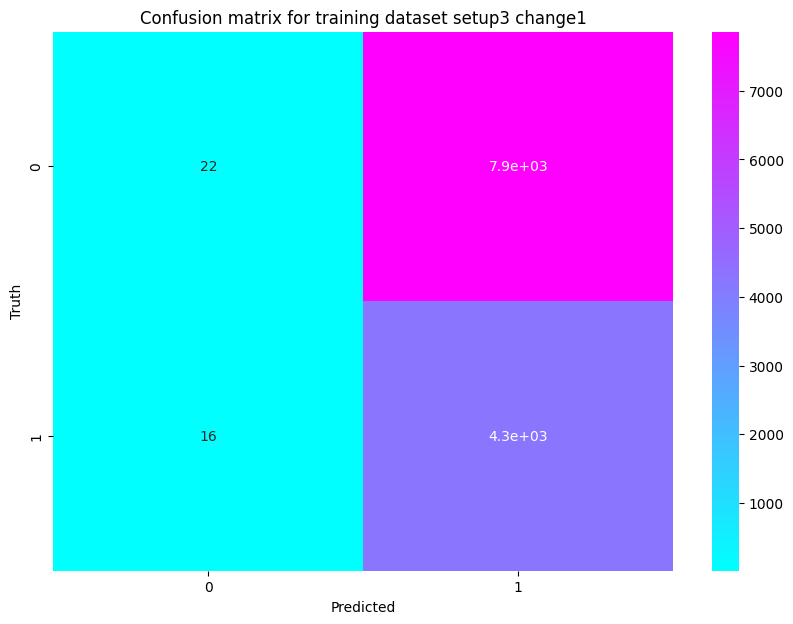

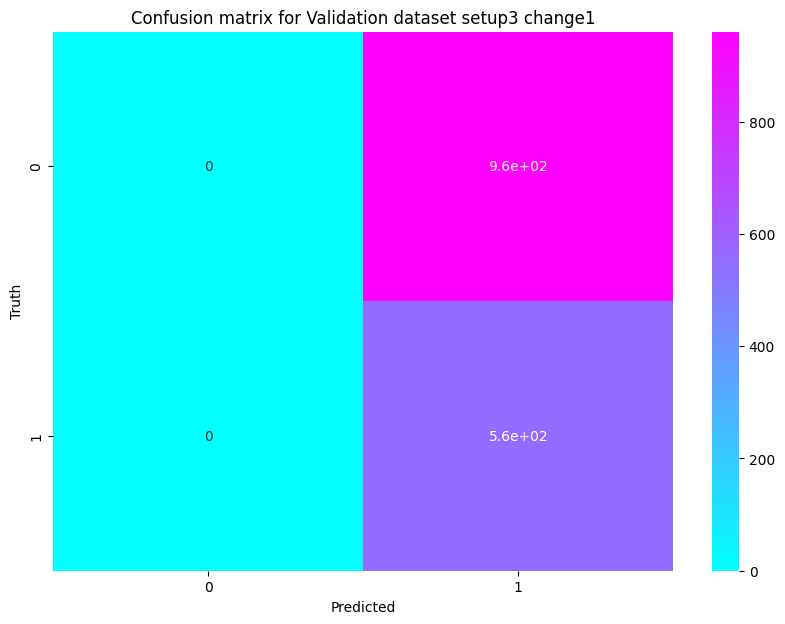

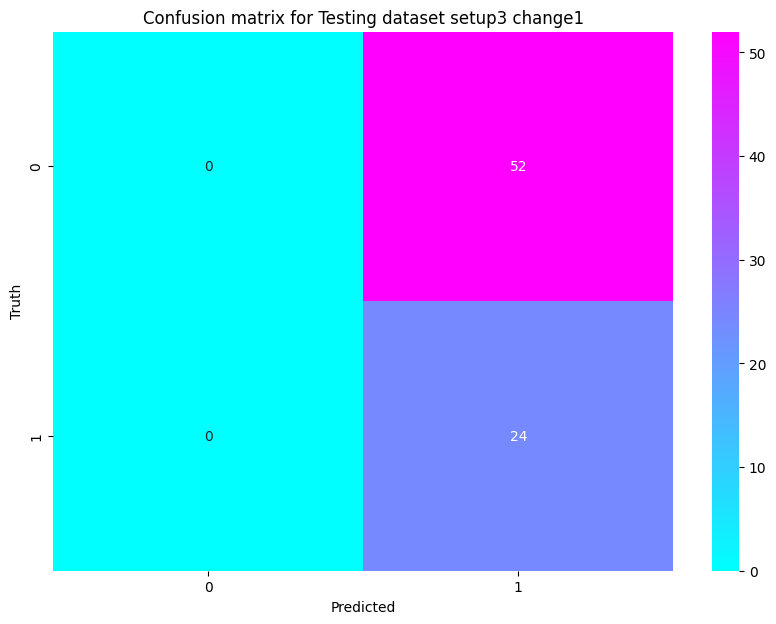

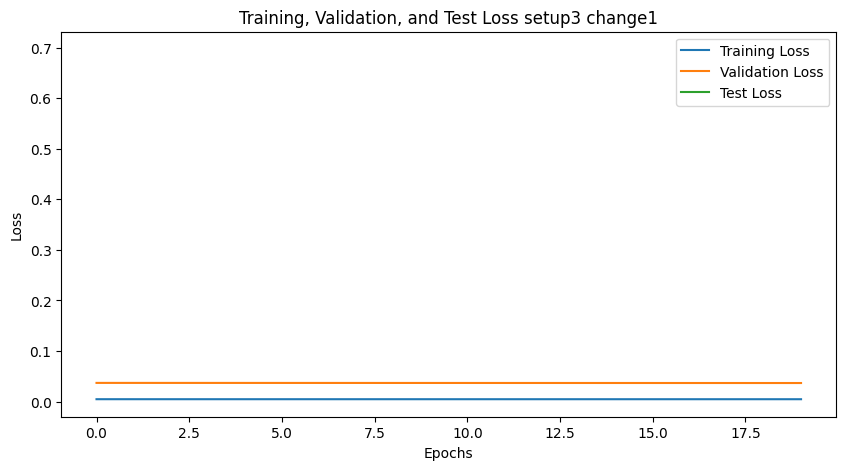

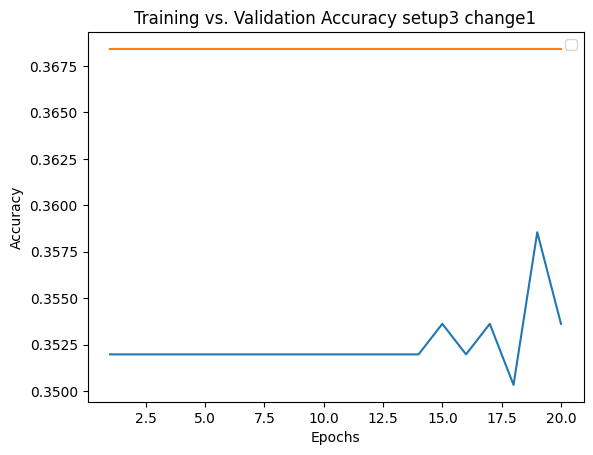

<ipython-input-39-ae4aa454cd67>:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-39-ae4aa454cd67>:258: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


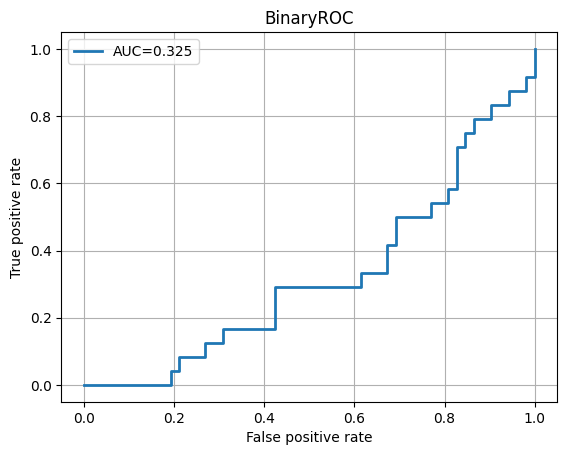

In [39]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_setup3_change1(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup3_change1, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup3_change1 = NeuralNetwork_setup3_change1()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup3_change1, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model_setup3_change1.parameters(), lr=0.002) # optimiser = SGD, learning rate = 0.002
train_losses_setup3_change1 = []
val_losses_setup3_change1 = []
train_pred_outside_epoch_setup3_change1 = []
train_true_outside_epoch_setup3_change1 = []
val_pred_outside_epoch_setup3_change1 = []
val_true_outside_epoch_setup3_change1 = []
train_accuracy_setup3_change1 = []
val_accuracy_setup3_change1 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup3_change1.train()  # Set the model_setup3_change1 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup3_change1 = []
    train_true_inside_epoch_setup3_change1 = []
    train_accuracy_inside_epoch_setup3_change1 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup3_change1(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup3_change1 = train_accuracy_inside_epoch_setup3_change1 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup3_change1 = train_pred_inside_epoch_setup3_change1 + train_predictions.tolist()
        train_true_inside_epoch_setup3_change1 = train_true_inside_epoch_setup3_change1 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup3_change1.append(train_loss)

    train_pred_outside_epoch_setup3_change1 = train_pred_outside_epoch_setup3_change1 + train_pred_inside_epoch_setup3_change1
    train_true_outside_epoch_setup3_change1 = train_true_outside_epoch_setup3_change1 + train_true_inside_epoch_setup3_change1

    train_accuracy_setup3_change1.append(train_accuracy_inside_epoch_setup3_change1/4.0)

    val_pred_inside_epoch_setup3_change1 = []
    val_true_inside_epoch_setup3_change1 = []

    val_accuracy_inside_epoch_setup3_change1 = 0

    # Validationstep
    model_setup3_change1.eval()  # Set the model_setup3_change1 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup3_change1(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup3_change1 = val_accuracy_inside_epoch_setup3_change1 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup3_change1 = val_pred_inside_epoch_setup3_change1 + val_predictions.tolist()
            val_true_inside_epoch_setup3_change1 = val_true_inside_epoch_setup3_change1 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup3_change1.append(val_loss)

    val_pred_outside_epoch_setup3_change1 = val_pred_outside_epoch_setup3_change1 + val_pred_inside_epoch_setup3_change1
    val_true_outside_epoch_setup3_change1 = val_true_outside_epoch_setup3_change1 + val_true_inside_epoch_setup3_change1

    val_accuracy_setup3_change1.append(val_accuracy_inside_epoch_setup3_change1/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup3_change1/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup3_change1/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup3_change1[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup3_change1[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup3_change1)}")
# print(f"{len(train_true_outside_epoch_setup3_change1)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup3_change1 = []
test_true_outside_epoch_setup3_change1 = []
test_loss = 0
model_setup3_change1.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup3_change1(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup3_change1 = test_pred_outside_epoch_setup3_change1 + test_predictions.tolist()
    test_true_outside_epoch_setup3_change1 = test_true_outside_epoch_setup3_change1 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup3_change1 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup3_change1 : {accuracy_test_setup3_change1}")
print(f"Precision_test_setup3_change1 : {precision}")
print(f"recall_test_setup3_change1 : {recall}")
print(f"f1_test_setup3_change1 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup3_change1 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup3_change1, train_pred_outside_epoch_setup3_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup3 change1")

plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup3_change1, val_pred_outside_epoch_setup3_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup3 change1")

plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup3_change1, test_pred_outside_epoch_setup3_change1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup3 change1")

plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup3_change1, label='Training Loss')
plt.plot(val_losses_setup3_change1, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup3 change1')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup3_change1) + 1)
plt.plot(epochs, train_accuracy_setup3_change1)
plt.plot(epochs, val_accuracy_setup3_change1)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup3 change1')
plt.legend()
plt.show()


# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP3 : change activation functions**

change 2 : change from leakyReLU to Tanh

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup3_change2             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─Tanh: 2-2                         [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─Tanh: 2-5                         [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─Tanh: 2-8                         [1, 256]                  --
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─Tanh: 2-11                        [1, 512]                  --
│ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


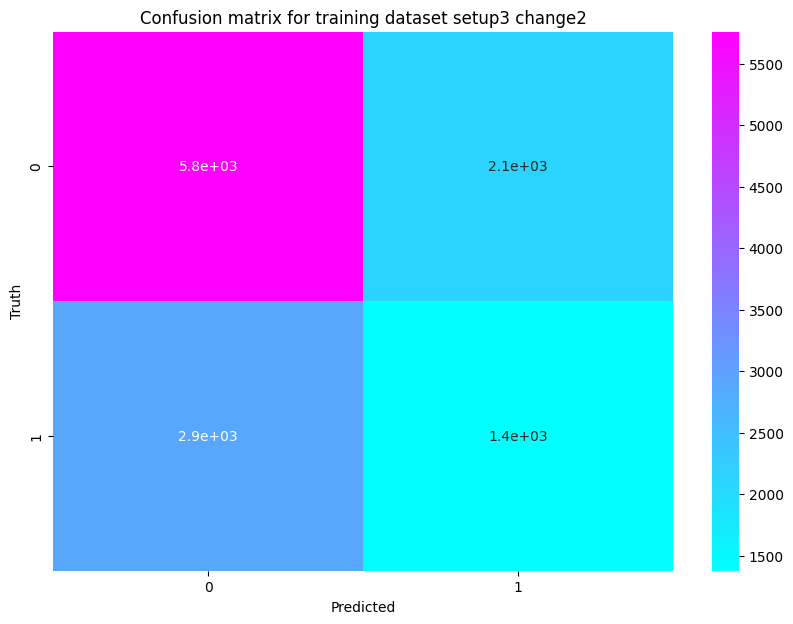

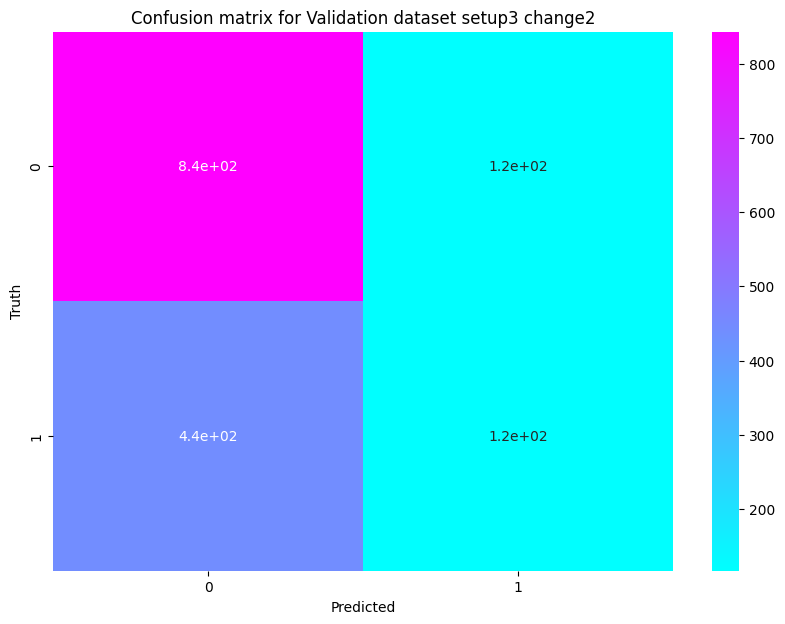

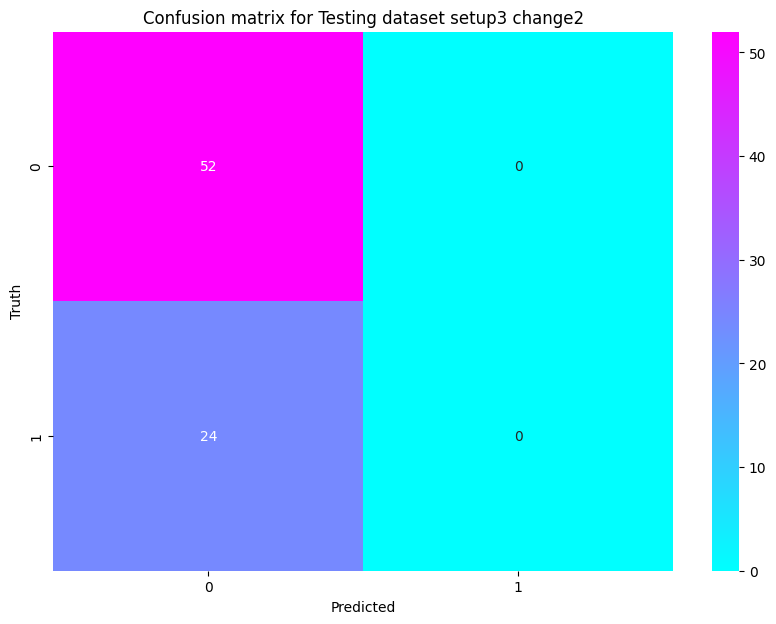

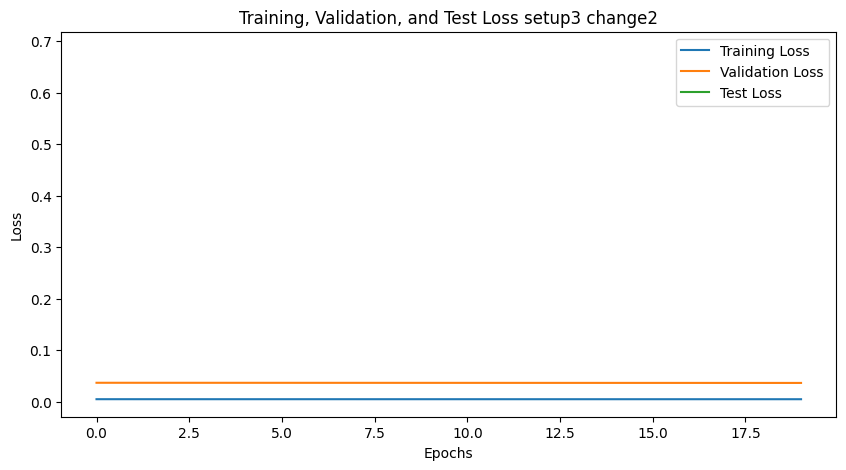

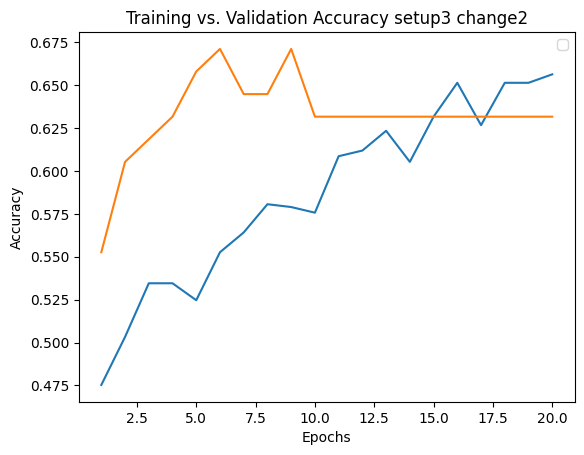

<ipython-input-40-3543e6806dbd>:257: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-40-3543e6806dbd>:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


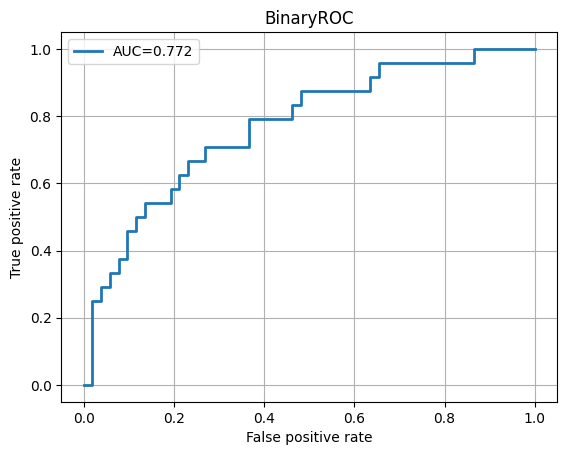

In [40]:
from torch.nn.modules.activation import Tanh
class NeuralNetwork_setup3_change2(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup3_change2, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.Tanh(),
            nn.Dropout(0.1),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.Tanh(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.Tanh(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup3_change2 = NeuralNetwork_setup3_change2()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup3_change2, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model_setup3_change2.parameters(), lr=0.002) # optimiser = SGD, learning rate = 0.002
train_losses_setup3_change2 = []
val_losses_setup3_change2 = []
train_pred_outside_epoch_setup3_change2 = []
train_true_outside_epoch_setup3_change2 = []
val_pred_outside_epoch_setup3_change2 = []
val_true_outside_epoch_setup3_change2 = []
train_accuracy_setup3_change2 = []
val_accuracy_setup3_change2 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup3_change2.train()  # Set the model_setup3_change2 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup3_change2 = []
    train_true_inside_epoch_setup3_change2 = []
    train_accuracy_inside_epoch_setup3_change2 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup3_change2(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup3_change2 = train_accuracy_inside_epoch_setup3_change2 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup3_change2 = train_pred_inside_epoch_setup3_change2 + train_predictions.tolist()
        train_true_inside_epoch_setup3_change2 = train_true_inside_epoch_setup3_change2 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup3_change2.append(train_loss)

    train_pred_outside_epoch_setup3_change2 = train_pred_outside_epoch_setup3_change2 + train_pred_inside_epoch_setup3_change2
    train_true_outside_epoch_setup3_change2 = train_true_outside_epoch_setup3_change2 + train_true_inside_epoch_setup3_change2

    train_accuracy_setup3_change2.append(train_accuracy_inside_epoch_setup3_change2/4.0)

    val_pred_inside_epoch_setup3_change2 = []
    val_true_inside_epoch_setup3_change2 = []

    val_accuracy_inside_epoch_setup3_change2 = 0

    # Validationstep
    model_setup3_change2.eval()  # Set the model_setup3_change2 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup3_change2(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup3_change2 = val_accuracy_inside_epoch_setup3_change2 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup3_change2 = val_pred_inside_epoch_setup3_change2 + val_predictions.tolist()
            val_true_inside_epoch_setup3_change2 = val_true_inside_epoch_setup3_change2 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup3_change2.append(val_loss)

    val_pred_outside_epoch_setup3_change2 = val_pred_outside_epoch_setup3_change2 + val_pred_inside_epoch_setup3_change2
    val_true_outside_epoch_setup3_change2 = val_true_outside_epoch_setup3_change2 + val_true_inside_epoch_setup3_change2

    val_accuracy_setup3_change2.append(val_accuracy_inside_epoch_setup3_change2/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup3_change2/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup3_change2/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup3_change2[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup3_change2[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup3_change2)}")
# print(f"{len(train_true_outside_epoch_setup3_change2)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup3_change2 = []
test_true_outside_epoch_setup3_change2 = []
test_loss = 0
model_setup3_change2.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup3_change2(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup3_change2 = test_pred_outside_epoch_setup3_change2 + test_predictions.tolist()
    test_true_outside_epoch_setup3_change2 = test_true_outside_epoch_setup3_change2 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup3_change2 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup3_change2 : {accuracy_test_setup3_change2}")
print(f"Precision_test_setup3_change2 : {precision}")
print(f"recall_test_setup3_change2 : {recall}")
print(f"f1_test_setup3_change2 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup3_change2 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup3_change2, train_pred_outside_epoch_setup3_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup3 change2")

plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup3_change2, val_pred_outside_epoch_setup3_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup3 change2")

plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup3_change2, test_pred_outside_epoch_setup3_change2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup3 change2")

plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup3_change2, label='Training Loss')
plt.plot(val_losses_setup3_change2, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup3 change2')
plt.legend()
plt.show()

# Accuracy graph
epochs = range(1, len(train_accuracy_setup3_change2) + 1)
plt.plot(epochs, train_accuracy_setup3_change2)
plt.plot(epochs, val_accuracy_setup3_change2)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup3 change2')
plt.legend()
plt.show()



# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **PART 2 SETUP3 : change activation functions**

change 3 : change from leakyReLU to parametric relu

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork_setup3_change3             [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 64]                   512
│    └─PReLU: 2-2                        [1, 64]                   1
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 128]                  8,320
│    └─PReLU: 2-5                        [1, 128]                  1
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 256]                  33,024
│    └─PReLU: 2-8                        [1, 256]                  1
│    └─Dropout: 2-9                      [1, 256]                  --
│    └─Linear: 2-10                      [1, 512]                  131,584
│    └─PReLU: 2-11                       [1, 512]                  1
│    └

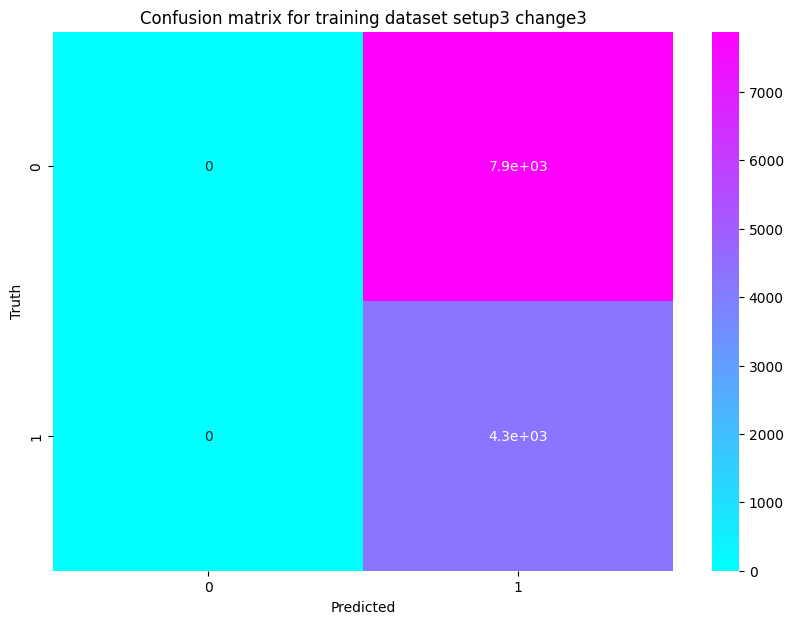

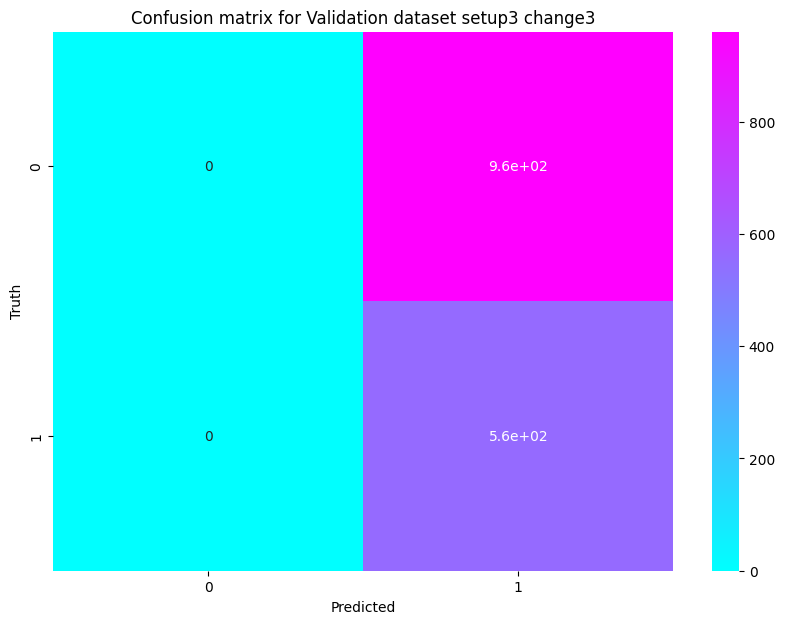

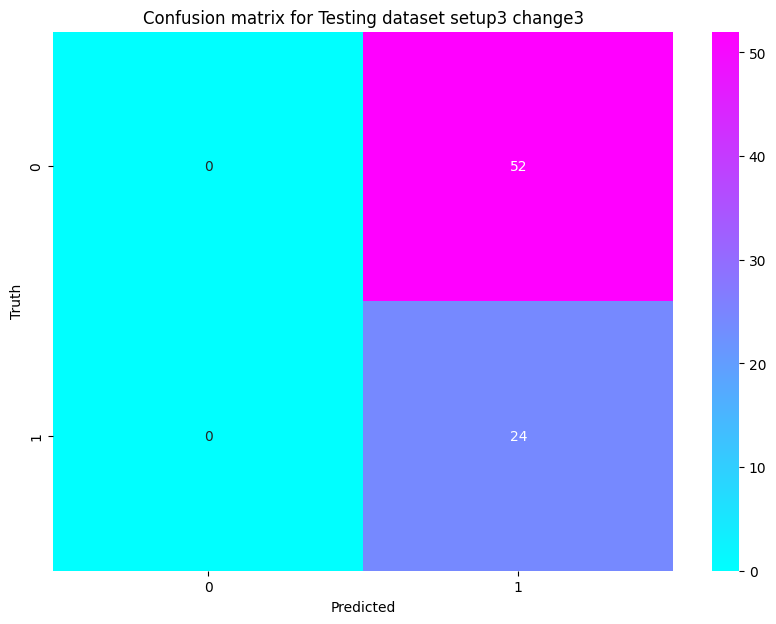

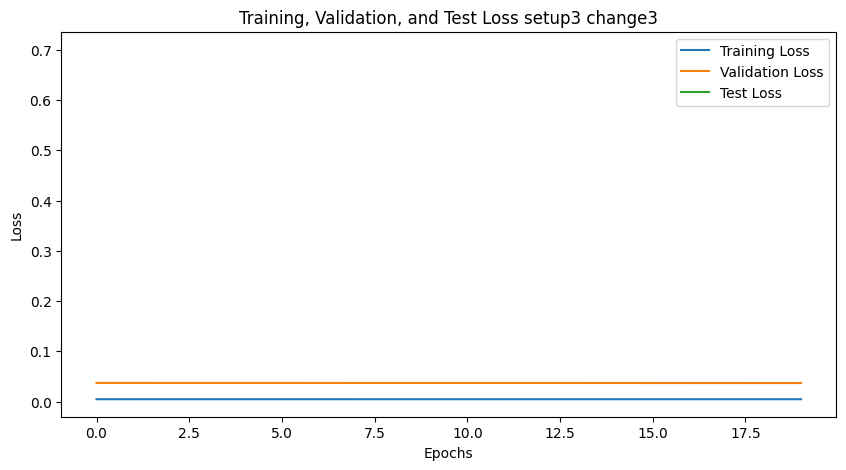

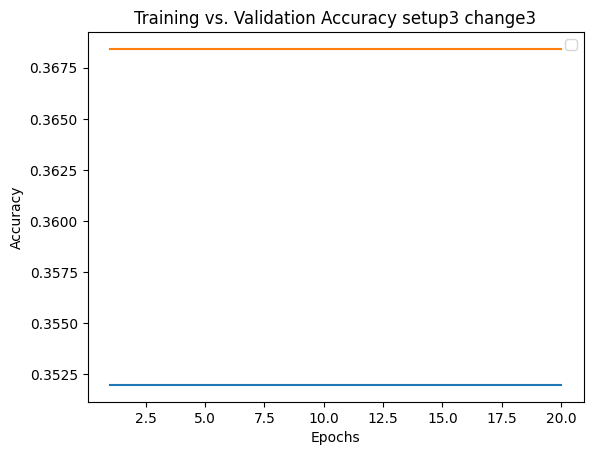

<ipython-input-41-dd2e4894e46f>:254: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_labels = torch.tensor(test_labels).to(torch.int64)
<ipython-input-41-dd2e4894e46f>:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  metric.update(torch.tensor(test_outputs), int_labels)


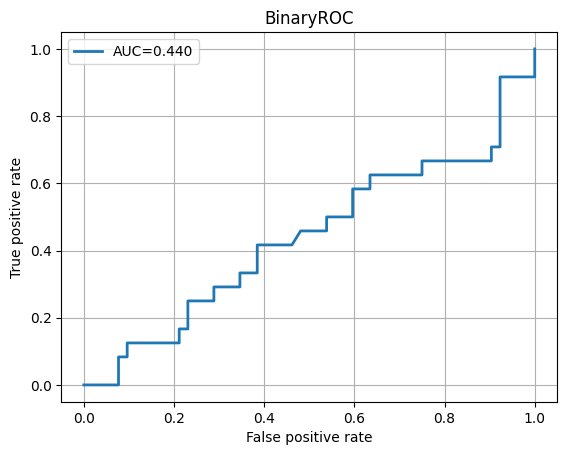

In [41]:
from torch.nn.modules.activation import PReLU
class NeuralNetwork_setup3_change3(nn.Module):
    def __init__(self):
        super(NeuralNetwork_setup3_change3, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.PReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 128),
            nn.PReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.PReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.PReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.PReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.PReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.PReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_setup3_change3 = NeuralNetwork_setup3_change3()

# Print the summary of the model
from torchinfo import summary
print(summary(model_setup3_change3, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model_setup3_change3.parameters(), lr=0.002) # optimiser = SGD, learning rate = 0.002
train_losses_setup3_change3 = []
val_losses_setup3_change3 = []
train_pred_outside_epoch_setup3_change3 = []
train_true_outside_epoch_setup3_change3 = []
val_pred_outside_epoch_setup3_change3 = []
val_true_outside_epoch_setup3_change3 = []
train_accuracy_setup3_change3 = []
val_accuracy_setup3_change3 = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20

    #Training step
    model_setup3_change3.train()  # Set the model_setup3_change3 to training mode
    running_loss = 0.0
    train_pred_inside_epoch_setup3_change3 = []
    train_true_inside_epoch_setup3_change3 = []
    train_accuracy_inside_epoch_setup3_change3 = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_setup3_change3(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_setup3_change3 = train_accuracy_inside_epoch_setup3_change3 + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_setup3_change3 = train_pred_inside_epoch_setup3_change3 + train_predictions.tolist()
        train_true_inside_epoch_setup3_change3 = train_true_inside_epoch_setup3_change3 + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_setup3_change3.append(train_loss)

    train_pred_outside_epoch_setup3_change3 = train_pred_outside_epoch_setup3_change3 + train_pred_inside_epoch_setup3_change3
    train_true_outside_epoch_setup3_change3 = train_true_outside_epoch_setup3_change3 + train_true_inside_epoch_setup3_change3

    train_accuracy_setup3_change3.append(train_accuracy_inside_epoch_setup3_change3/4.0)

    val_pred_inside_epoch_setup3_change3 = []
    val_true_inside_epoch_setup3_change3 = []

    val_accuracy_inside_epoch_setup3_change3 = 0

    # Validationstep
    model_setup3_change3.eval()  # Set the model_setup3_change3 to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_setup3_change3(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_setup3_change3 = val_accuracy_inside_epoch_setup3_change3 + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_setup3_change3 = val_pred_inside_epoch_setup3_change3 + val_predictions.tolist()
            val_true_inside_epoch_setup3_change3 = val_true_inside_epoch_setup3_change3 + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_setup3_change3.append(val_loss)

    val_pred_outside_epoch_setup3_change3 = val_pred_outside_epoch_setup3_change3 + val_pred_inside_epoch_setup3_change3
    val_true_outside_epoch_setup3_change3 = val_true_outside_epoch_setup3_change3 + val_true_inside_epoch_setup3_change3

    val_accuracy_setup3_change3.append(val_accuracy_inside_epoch_setup3_change3/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_setup3_change3/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_setup3_change3/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_setup3_change3[0:10]}")
# print(f"Validation accuracy : {val_accuracy_setup3_change3[0:10]}")

# print(f"{len(train_pred_outside_epoch_setup3_change3)}")
# print(f"{len(train_true_outside_epoch_setup3_change3)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_setup3_change3 = []
test_true_outside_epoch_setup3_change3 = []
test_loss = 0
model_setup3_change3.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_setup3_change3(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_setup3_change3 = test_pred_outside_epoch_setup3_change3 + test_predictions.tolist()
    test_true_outside_epoch_setup3_change3 = test_true_outside_epoch_setup3_change3 + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_setup3_change3 = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_setup3_change3 : {accuracy_test_setup3_change3}")
print(f"Precision_test_setup3_change3 : {precision}")
print(f"recall_test_setup3_change3 : {recall}")
print(f"f1_test_setup3_change3 : {f1}")
print(f"time taken during testing dataset evaluation _test_setup3_change3 : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




#Confusion matrix for training dataset


cm = confusion_matrix(train_true_outside_epoch_setup3_change3, train_pred_outside_epoch_setup3_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for training dataset setup3 change3")
plt.show()

#Confusion matrix for Validation dataset


cm = confusion_matrix(val_true_outside_epoch_setup3_change3, val_pred_outside_epoch_setup3_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Validation dataset setup3 change3")
plt.show()

#Confusion matrix for testing dataset


cm = confusion_matrix(test_true_outside_epoch_setup3_change3, test_pred_outside_epoch_setup3_change3)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="cool")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Testing dataset setup3 change3")
plt.show()

#Loss graph

plt.figure(figsize=(10, 5))
plt.plot(train_losses_setup3_change3, label='Training Loss')
plt.plot(val_losses_setup3_change3, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')  # assuming you have this list
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss setup3 change3')
plt.legend()
plt.show()



# Accuracy graph
epochs = range(1, len(train_accuracy_setup3_change3) + 1)
plt.plot(epochs, train_accuracy_setup3_change3)
plt.plot(epochs, val_accuracy_setup3_change3)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy setup3 change3')
plt.legend()
plt.show()

# ROC Curve

int_labels = torch.tensor(test_labels).to(torch.int64)
metric = BinaryROC(thresholds=None)
metric.update(torch.tensor(test_outputs), int_labels)
fpr, tpr, thresholds = metric.compute()
fig, ax = metric.plot(score=True)

# **Best model setup :**

setup 1 change 1

changed the dropouts rates to 0.4 for all layers

Optimizer = Adagrad

Activation function = LeakyReLU

In [55]:
model_path = '/content/ggolla_schakka_assignment2_part2.pth'

# Save the model to the specified path
torch.save(model_setup1_change3.state_dict(), model_path)

In [168]:
!pip install pytorch-ignite

import ignite
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, Accuracy
from ignite.handlers import EarlyStopping



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.4/272.4 kB 4.0 MB/s eta 0:00:00


# **Early stopping**

Layer (type:depth-idx)                        Output Shape              Param #
NeuralNetwork_part2_best_model_early_stop     [1, 1]                    --
├─Sequential: 1-1                             [1, 1]                    --
│    └─Linear: 2-1                            [1, 64]                   512
│    └─LeakyReLU: 2-2                         [1, 64]                   --
│    └─Dropout: 2-3                           [1, 64]                   --
│    └─Linear: 2-4                            [1, 128]                  8,320
│    └─LeakyReLU: 2-5                         [1, 128]                  --
│    └─Dropout: 2-6                           [1, 128]                  --
│    └─Linear: 2-7                            [1, 256]                  33,024
│    └─LeakyReLU: 2-8                         [1, 256]                  --
│    └─Dropout: 2-9                           [1, 256]                  --
│    └─Linear: 2-10                           [1, 512]                  131,584
│    └─

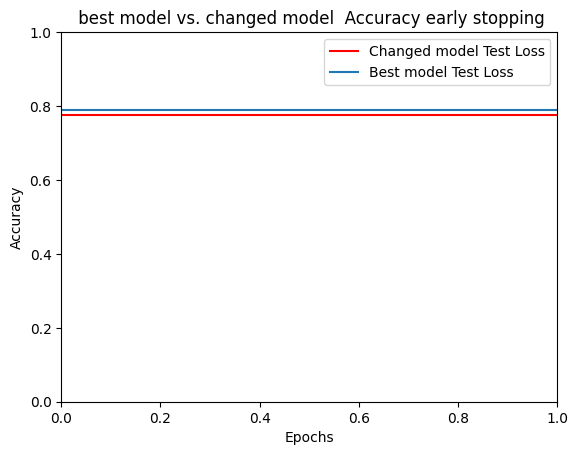

In [48]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_part2_best_model_early_stop(nn.Module):
    def __init__(self):
        super(NeuralNetwork_part2_best_model_early_stop, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.6),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_part2_best_model_early_stop = NeuralNetwork_part2_best_model_early_stop()

# Print the summary of the model
from torchinfo import summary
print(summary(model_part2_best_model_early_stop, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model_part2_best_model_early_stop.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_part2_best_model_early_stop = []
val_losses_part2_best_model_early_stop = []
train_pred_outside_epoch_part2_best_model_early_stop = []
train_true_outside_epoch_part2_best_model_early_stop = []
val_pred_outside_epoch_part2_best_model_early_stop = []
val_true_outside_epoch_part2_best_model_early_stop = []
train_accuracy_part2_best_model_early_stop = []
val_accuracy_part2_best_model_early_stop = []

max_count = 10
temp = 0
min_val_loss = float('inf')
# Training loop
start_time = time.time()
for epoch in range(200): # number of epochs = 200

    #Training step
    model_part2_best_model_early_stop.train()  # Set the model_part2_best_model_early_stop to training mode
    running_loss = 0.0
    train_pred_inside_epoch_part2_best_model_early_stop = []
    train_true_inside_epoch_part2_best_model_early_stop = []
    train_accuracy_inside_epoch_part2_best_model_early_stop = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_part2_best_model_early_stop(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_part2_best_model_early_stop = train_accuracy_inside_epoch_part2_best_model_early_stop + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_part2_best_model_early_stop = train_pred_inside_epoch_part2_best_model_early_stop + train_predictions.tolist()
        train_true_inside_epoch_part2_best_model_early_stop = train_true_inside_epoch_part2_best_model_early_stop + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_part2_best_model_early_stop.append(train_loss)

    train_pred_outside_epoch_part2_best_model_early_stop = train_pred_outside_epoch_part2_best_model_early_stop + train_pred_inside_epoch_part2_best_model_early_stop
    train_true_outside_epoch_part2_best_model_early_stop = train_true_outside_epoch_part2_best_model_early_stop + train_true_inside_epoch_part2_best_model_early_stop

    train_accuracy_part2_best_model_early_stop.append(train_accuracy_inside_epoch_part2_best_model_early_stop/4.0)

    val_pred_inside_epoch_part2_best_model_early_stop = []
    val_true_inside_epoch_part2_best_model_early_stop = []

    val_accuracy_inside_epoch_part2_best_model_early_stop = 0

    # Validationstep
    model_part2_best_model_early_stop.eval()  # Set the model_part2_best_model_early_stop to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_part2_best_model_early_stop(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_part2_best_model_early_stop = val_accuracy_inside_epoch_part2_best_model_early_stop + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_part2_best_model_early_stop = val_pred_inside_epoch_part2_best_model_early_stop + val_predictions.tolist()
            val_true_inside_epoch_part2_best_model_early_stop = val_true_inside_epoch_part2_best_model_early_stop + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_part2_best_model_early_stop.append(val_loss)

    val_pred_outside_epoch_part2_best_model_early_stop = val_pred_outside_epoch_part2_best_model_early_stop + val_pred_inside_epoch_part2_best_model_early_stop
    val_true_outside_epoch_part2_best_model_early_stop = val_true_outside_epoch_part2_best_model_early_stop + val_true_inside_epoch_part2_best_model_early_stop

    val_accuracy_part2_best_model_early_stop.append(val_accuracy_inside_epoch_part2_best_model_early_stop/4.0)

    if val_loss < min_val_loss:
      min_val_loss = val_loss
      temp = 0
    else:
      temp = temp + 1
      if temp >= max_count:
        print("breaking out from epochs to counter overfitting")
        break

    print(f'epoch : {epoch } out of 200 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_part2_best_model_early_stop/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_part2_best_model_early_stop/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_part2_best_model_early_stop[0:10]}")
# print(f"Validation accuracy : {val_accuracy_part2_best_model_early_stop[0:10]}")

# print(f"{len(train_pred_outside_epoch_part2_best_model_early_stop)}")
# print(f"{len(train_true_outside_epoch_part2_best_model_early_stop)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_part2_best_model_early_stop = []
test_true_outside_epoch_part2_best_model_early_stop = []
test_loss = 0
model_part2_best_model_early_stop.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_part2_best_model_early_stop(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_part2_best_model_early_stop = test_pred_outside_epoch_part2_best_model_early_stop + test_predictions.tolist()
    test_true_outside_epoch_part2_best_model_early_stop = test_true_outside_epoch_part2_best_model_early_stop + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_part2_best_model_early_stop = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_part2_best_model_early_stop : {accuracy_test_part2_best_model_early_stop}")
print(f"Precision_test_part2_best_model_early_stop : {precision}")
print(f"recall_test_part2_best_model_early_stop : {recall}")
print(f"f1_test_part2_best_model_early_stop : {f1}")
print(f"time taken during testing dataset evaluation _test_part2_best_model_early_stop : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




# #Confusion matrix for training dataset


# cm = confusion_matrix(train_true_outside_epoch_part2_best_model_early_stop, train_pred_outside_epoch_part2_best_model_early_stop)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for Validation dataset


# cm = confusion_matrix(val_true_outside_epoch_part2_best_model_early_stop, val_pred_outside_epoch_part2_best_model_early_stop)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for testing dataset


# cm = confusion_matrix(test_true_outside_epoch_part2_best_model_early_stop, test_pred_outside_epoch_part2_best_model_early_stop)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Loss graph

# plt.figure(figsize=(10, 5))
# plt.plot(train_losses_part2_best_model_early_stop, label='Training Loss')
# plt.plot(val_losses_part2_best_model_early_stop, label='Validation Loss')
# plt.plot(test_loss, label='Test Loss')  # assuming you have this list
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training, Validation, and Test Loss')
# plt.legend()
# plt.show()

# Accuracy graph

epochs = range(1, len(train_accuracy_setup3_change3) + 1)
plt.axhline(y=accuracy_test_part2_best_model_early_stop ,color='r',label='Changed model Test Loss')
plt.axhline(y=accuracy_test_setup1_change3,label='Best model Test Loss')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(' best model vs. changed model  Accuracy early stopping')
plt.legend()
plt.show()

# # ROC Curve

# int_labels = torch.tensor(test_labels).to(torch.int64)
# metric = BinaryROC(thresholds=None)
# metric.update(torch.tensor(test_outputs), int_labels)
# fpr, tpr, thresholds = metric.compute()
# fig, ax = metric.plot(score=True)

In [176]:
from torch.optim.lr_scheduler import StepLR

# **Learning rate scheduling**

Layer (type:depth-idx)                                  Output Shape              Param #
NeuralNetwork_part2_best_model_learning_rate_schedule   [1, 1]                    --
├─Sequential: 1-1                                       [1, 1]                    --
│    └─Linear: 2-1                                      [1, 64]                   512
│    └─LeakyReLU: 2-2                                   [1, 64]                   --
│    └─Dropout: 2-3                                     [1, 64]                   --
│    └─Linear: 2-4                                      [1, 128]                  8,320
│    └─LeakyReLU: 2-5                                   [1, 128]                  --
│    └─Dropout: 2-6                                     [1, 128]                  --
│    └─Linear: 2-7                                      [1, 256]                  33,024
│    └─LeakyReLU: 2-8                                   [1, 256]                  --
│    └─Dropout: 2-9                                 

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch : 0 out of 20 : Training Loss is 0.00461953241182001, Validation Loss is 0.03602414382131476, Training Accuracy : 0.412828947368421, Validation Accuracy : 0.631578947368421 
epoch : 1 out of 20 : Training Loss is 0.004301886907533596, Validation Loss is 0.03431461437752372, Training Accuracy : 0.6381578947368421, Validation Accuracy : 0.631578947368421 
epoch : 2 out of 20 : Training Loss is 0.004080654857190032, Validation Loss is 0.03326990102466784, Training Accuracy : 0.6480263157894737, Validation Accuracy : 0.631578947368421 
epoch : 3 out of 20 : Training Loss is 0.003866818292360557, Validation Loss is 0.032469165168310464, Training Accuracy : 0.6480263157894737, Validation Accuracy : 0.6710526315789473 
epoch : 4 out of 20 : Training Loss is 0.003751775347872784, Validation Loss is 0.031748178758119285, Training Accuracy : 0.6759868421052632, Validation Accuracy : 0.6973684210526316 
epoch : 5 out of 20 : Training Loss is 0.0036228791271385396, Validation Loss is 0.03138

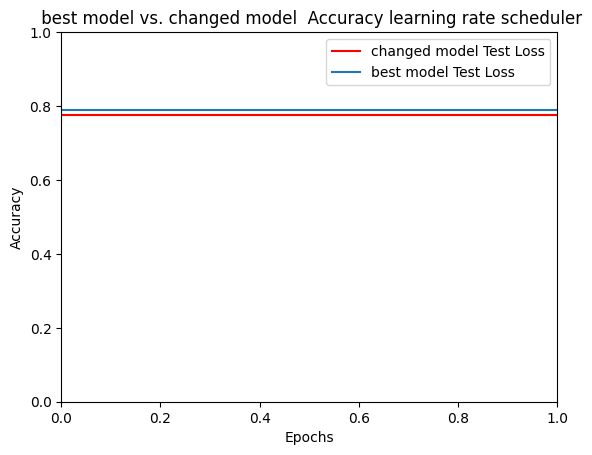

In [50]:
from torch.nn.modules.activation import ReLU
from torch.optim.lr_scheduler import StepLR
class NeuralNetwork_part2_best_model_learning_rate_schedule(nn.Module):
    def __init__(self):
        super(NeuralNetwork_part2_best_model_learning_rate_schedule, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_part2_best_model_learning_rate_schedule = NeuralNetwork_part2_best_model_learning_rate_schedule()

# Print the summary of the model
from torchinfo import summary
print(summary(model_part2_best_model_learning_rate_schedule, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model_part2_best_model_learning_rate_schedule.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_part2_best_model_learning_rate_schedule = []
val_losses_part2_best_model_learning_rate_schedule = []
train_pred_outside_epoch_part2_best_model_learning_rate_schedule = []
train_true_outside_epoch_part2_best_model_learning_rate_schedule = []
val_pred_outside_epoch_part2_best_model_learning_rate_schedule = []
val_true_outside_epoch_part2_best_model_learning_rate_schedule = []
train_accuracy_part2_best_model_learning_rate_schedule = []
val_accuracy_part2_best_model_learning_rate_schedule = []

max_count = 10
temp = 0
min_val_loss = float('inf')

scheduler = StepLR(optimizer, step_size=10, gamma=0.5)


# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20
    #Training step
    scheduler.step()
    model_part2_best_model_learning_rate_schedule.train()  # Set the model_part2_best_model_learning_rate_schedule to training mode
    running_loss = 0.0
    train_pred_inside_epoch_part2_best_model_learning_rate_schedule = []
    train_true_inside_epoch_part2_best_model_learning_rate_schedule = []
    train_accuracy_inside_epoch_part2_best_model_learning_rate_schedule = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_part2_best_model_learning_rate_schedule(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_part2_best_model_learning_rate_schedule = train_accuracy_inside_epoch_part2_best_model_learning_rate_schedule + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_part2_best_model_learning_rate_schedule = train_pred_inside_epoch_part2_best_model_learning_rate_schedule + train_predictions.tolist()
        train_true_inside_epoch_part2_best_model_learning_rate_schedule = train_true_inside_epoch_part2_best_model_learning_rate_schedule + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_part2_best_model_learning_rate_schedule.append(train_loss)

    train_pred_outside_epoch_part2_best_model_learning_rate_schedule = train_pred_outside_epoch_part2_best_model_learning_rate_schedule + train_pred_inside_epoch_part2_best_model_learning_rate_schedule
    train_true_outside_epoch_part2_best_model_learning_rate_schedule = train_true_outside_epoch_part2_best_model_learning_rate_schedule + train_true_inside_epoch_part2_best_model_learning_rate_schedule

    train_accuracy_part2_best_model_learning_rate_schedule.append(train_accuracy_inside_epoch_part2_best_model_learning_rate_schedule/4.0)

    val_pred_inside_epoch_part2_best_model_learning_rate_schedule = []
    val_true_inside_epoch_part2_best_model_learning_rate_schedule = []

    val_accuracy_inside_epoch_part2_best_model_learning_rate_schedule = 0

    # Validationstep
    model_part2_best_model_learning_rate_schedule.eval()  # Set the model_part2_best_model_learning_rate_schedule to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_part2_best_model_learning_rate_schedule(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_part2_best_model_learning_rate_schedule = val_accuracy_inside_epoch_part2_best_model_learning_rate_schedule + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_part2_best_model_learning_rate_schedule = val_pred_inside_epoch_part2_best_model_learning_rate_schedule + val_predictions.tolist()
            val_true_inside_epoch_part2_best_model_learning_rate_schedule = val_true_inside_epoch_part2_best_model_learning_rate_schedule + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_part2_best_model_learning_rate_schedule.append(val_loss)

    val_pred_outside_epoch_part2_best_model_learning_rate_schedule = val_pred_outside_epoch_part2_best_model_learning_rate_schedule + val_pred_inside_epoch_part2_best_model_learning_rate_schedule
    val_true_outside_epoch_part2_best_model_learning_rate_schedule = val_true_outside_epoch_part2_best_model_learning_rate_schedule + val_true_inside_epoch_part2_best_model_learning_rate_schedule

    val_accuracy_part2_best_model_learning_rate_schedule.append(val_accuracy_inside_epoch_part2_best_model_learning_rate_schedule/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_part2_best_model_learning_rate_schedule/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_part2_best_model_learning_rate_schedule/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_part2_best_model_learning_rate_schedule[0:10]}")
# print(f"Validation accuracy : {val_accuracy_part2_best_model_learning_rate_schedule[0:10]}")

# print(f"{len(train_pred_outside_epoch_part2_best_model_learning_rate_schedule)}")
# print(f"{len(train_true_outside_epoch_part2_best_model_learning_rate_schedule)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_part2_best_model_learning_rate_schedule = []
test_true_outside_epoch_part2_best_model_learning_rate_schedule = []
test_loss = 0
model_part2_best_model_learning_rate_schedule.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_part2_best_model_learning_rate_schedule(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_part2_best_model_learning_rate_schedule = test_pred_outside_epoch_part2_best_model_learning_rate_schedule + test_predictions.tolist()
    test_true_outside_epoch_part2_best_model_learning_rate_schedule = test_true_outside_epoch_part2_best_model_learning_rate_schedule + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_part2_best_model_learning_rate_schedule = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_part2_best_model_learning_rate_schedule : {accuracy_test_part2_best_model_learning_rate_schedule}")
print(f"Precision_test_part2_best_model_learning_rate_schedule : {precision}")
print(f"recall_test_part2_best_model_learning_rate_schedule : {recall}")
print(f"f1_test_part2_best_model_learning_rate_schedule : {f1}")
print(f"time taken during testing dataset evaluation _test_part2_best_model_learning_rate_schedule : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy graph

epochs = range(1, len(train_accuracy_setup3_change3) + 1)
plt.axhline(y=accuracy_test_part2_best_model_learning_rate_schedule ,color='r',label='changed model Test Loss')
plt.axhline(y=accuracy_test_setup1_change3,label='best model Test Loss')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(' best model vs. changed model  Accuracy learning rate scheduler')
plt.legend()
plt.show()



# #Confusion matrix for training dataset


# cm = confusion_matrix(train_true_outside_epoch_part2_best_model_learning_rate_schedule, train_pred_outside_epoch_part2_best_model_learning_rate_schedule)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for Validation dataset


# cm = confusion_matrix(val_true_outside_epoch_part2_best_model_learning_rate_schedule, val_pred_outside_epoch_part2_best_model_learning_rate_schedule)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for testing dataset


# cm = confusion_matrix(test_true_outside_epoch_part2_best_model_learning_rate_schedule, test_pred_outside_epoch_part2_best_model_learning_rate_schedule)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Loss graph

# plt.figure(figsize=(10, 5))
# plt.plot(train_losses_part2_best_model_learning_rate_schedule, label='Training Loss')
# plt.plot(val_losses_part2_best_model_learning_rate_schedule, label='Validation Loss')
# plt.plot(test_loss, label='Test Loss')  # assuming you have this list
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training, Validation, and Test Loss')
# plt.legend()
# plt.show()

# # Accuracy graph

# import matplotlib.pyplot as plt

# # Plot accuracy
# plt.plot(range(1, len(train_accuracy_part2_best_model_learning_rate_schedule) + 1), [1 - loss for loss in train_accuracy_part2_best_model_learning_rate_schedule], label='Training')
# plt.plot(range(1, len(val_accuracy_part2_best_model_learning_rate_schedule) + 1), [1 - loss for loss in val_accuracy_part2_best_model_learning_rate_schedule], label='Validation')

# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training vs. Validation Accuracy')
# plt.legend()
# plt.show()

# # ROC Curve

# int_labels = torch.tensor(test_labels).to(torch.int64)
# metric = BinaryROC(thresholds=None)
# metric.update(torch.tensor(test_outputs), int_labels)
# fpr, tpr, thresholds = metric.compute()
# fig, ax = metric.plot(score=True)

# **Batch Normalization**

Layer (type:depth-idx)                                  Output Shape              Param #
NeuralNetwork_part2_best_model_batch_normalization      [1, 1]                    --
├─Sequential: 1-1                                       [1, 1]                    --
│    └─Linear: 2-1                                      [1, 64]                   512
│    └─BatchNorm1d: 2-2                                 [1, 64]                   128
│    └─LeakyReLU: 2-3                                   [1, 64]                   --
│    └─Dropout: 2-4                                     [1, 64]                   --
│    └─Linear: 2-5                                      [1, 128]                  8,320
│    └─BatchNorm1d: 2-6                                 [1, 128]                  256
│    └─LeakyReLU: 2-7                                   [1, 128]                  --
│    └─Dropout: 2-8                                     [1, 128]                  --
│    └─Linear: 2-9                                    

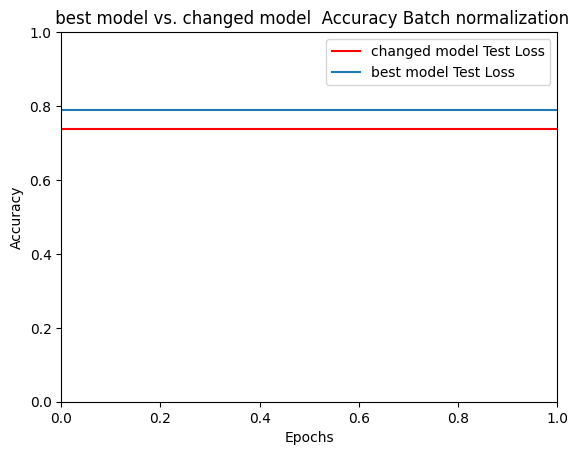

In [51]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_part2_best_model_batch_normalization(nn.Module):
    def __init__(self):
        super(NeuralNetwork_part2_best_model_batch_normalization, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 1),

        )

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_part2_best_model_batch_normalization = NeuralNetwork_part2_best_model_batch_normalization()

# Print the summary of the model
from torchinfo import summary
print(summary(model_part2_best_model_batch_normalization, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model_part2_best_model_batch_normalization.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_part2_best_model_batch_normalization = []
val_losses_part2_best_model_batch_normalization = []
train_pred_outside_epoch_part2_best_model_batch_normalization = []
train_true_outside_epoch_part2_best_model_batch_normalization = []
val_pred_outside_epoch_part2_best_model_batch_normalization = []
val_true_outside_epoch_part2_best_model_batch_normalization = []
train_accuracy_part2_best_model_batch_normalization = []
val_accuracy_part2_best_model_batch_normalization = []

# max_count = 10
# temp = 0
# min_val_loss = float('inf')

# scheduler = StepLR(optimizer, step_size=10, gamma=0.5)


# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20
    #Training step
    model_part2_best_model_batch_normalization.train()  # Set the model_part2_best_model_batch_normalization to training mode
    running_loss = 0.0
    train_pred_inside_epoch_part2_best_model_batch_normalization = []
    train_true_inside_epoch_part2_best_model_batch_normalization = []
    train_accuracy_inside_epoch_part2_best_model_batch_normalization = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_part2_best_model_batch_normalization(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_part2_best_model_batch_normalization = train_accuracy_inside_epoch_part2_best_model_batch_normalization + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_part2_best_model_batch_normalization = train_pred_inside_epoch_part2_best_model_batch_normalization + train_predictions.tolist()
        train_true_inside_epoch_part2_best_model_batch_normalization = train_true_inside_epoch_part2_best_model_batch_normalization + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_part2_best_model_batch_normalization.append(train_loss)

    train_pred_outside_epoch_part2_best_model_batch_normalization = train_pred_outside_epoch_part2_best_model_batch_normalization + train_pred_inside_epoch_part2_best_model_batch_normalization
    train_true_outside_epoch_part2_best_model_batch_normalization = train_true_outside_epoch_part2_best_model_batch_normalization + train_true_inside_epoch_part2_best_model_batch_normalization

    train_accuracy_part2_best_model_batch_normalization.append(train_accuracy_inside_epoch_part2_best_model_batch_normalization/4.0)

    val_pred_inside_epoch_part2_best_model_batch_normalization = []
    val_true_inside_epoch_part2_best_model_batch_normalization = []

    val_accuracy_inside_epoch_part2_best_model_batch_normalization = 0

    # Validationstep
    model_part2_best_model_batch_normalization.eval()  # Set the model_part2_best_model_batch_normalization to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_part2_best_model_batch_normalization(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_part2_best_model_batch_normalization = val_accuracy_inside_epoch_part2_best_model_batch_normalization + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_part2_best_model_batch_normalization = val_pred_inside_epoch_part2_best_model_batch_normalization + val_predictions.tolist()
            val_true_inside_epoch_part2_best_model_batch_normalization = val_true_inside_epoch_part2_best_model_batch_normalization + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_part2_best_model_batch_normalization.append(val_loss)

    val_pred_outside_epoch_part2_best_model_batch_normalization = val_pred_outside_epoch_part2_best_model_batch_normalization + val_pred_inside_epoch_part2_best_model_batch_normalization
    val_true_outside_epoch_part2_best_model_batch_normalization = val_true_outside_epoch_part2_best_model_batch_normalization + val_true_inside_epoch_part2_best_model_batch_normalization

    val_accuracy_part2_best_model_batch_normalization.append(val_accuracy_inside_epoch_part2_best_model_batch_normalization/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_part2_best_model_batch_normalization/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_part2_best_model_batch_normalization/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_part2_best_model_batch_normalization[0:10]}")
# print(f"Validation accuracy : {val_accuracy_part2_best_model_batch_normalization[0:10]}")

# print(f"{len(train_pred_outside_epoch_part2_best_model_batch_normalization)}")
# print(f"{len(train_true_outside_epoch_part2_best_model_batch_normalization)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_part2_best_model_batch_normalization = []
test_true_outside_epoch_part2_best_model_batch_normalization = []
test_loss = 0
model_part2_best_model_batch_normalization.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_part2_best_model_batch_normalization(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_part2_best_model_batch_normalization = test_pred_outside_epoch_part2_best_model_batch_normalization + test_predictions.tolist()
    test_true_outside_epoch_part2_best_model_batch_normalization = test_true_outside_epoch_part2_best_model_batch_normalization + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_part2_best_model_batch_normalization = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_part2_best_model_batch_normalization : {accuracy_test_part2_best_model_batch_normalization}")
print(f"Precision_test_part2_best_model_batch_normalization : {precision}")
print(f"recall_test_part2_best_model_batch_normalization : {recall}")
print(f"f1_test_part2_best_model_batch_normalization : {f1}")
print(f"time taken during testing dataset evaluation _test_part2_best_model_batch_normalization : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy graph

epochs = range(1, len(train_accuracy_setup3_change3) + 1)
plt.axhline(y=accuracy_test_part2_best_model_batch_normalization ,color='r',label='changed model Test Loss')
plt.axhline(y=accuracy_test_setup1_change3,label='best model Test Loss')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(' best model vs. changed model  Accuracy Batch normalization')
plt.legend()
plt.show()





# #Confusion matrix for training dataset


# cm = confusion_matrix(train_true_outside_epoch_part2_best_model_batch_normalization, train_pred_outside_epoch_part2_best_model_batch_normalization)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for Validation dataset


# cm = confusion_matrix(val_true_outside_epoch_part2_best_model_batch_normalization, val_pred_outside_epoch_part2_best_model_batch_normalization)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for testing dataset


# cm = confusion_matrix(test_true_outside_epoch_part2_best_model_batch_normalization, test_pred_outside_epoch_part2_best_model_batch_normalization)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Loss graph

# plt.figure(figsize=(10, 5))
# plt.plot(train_losses_part2_best_model_batch_normalization, label='Training Loss')
# plt.plot(val_losses_part2_best_model_batch_normalization, label='Validation Loss')
# plt.plot(test_loss, label='Test Loss')  # assuming you have this list
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training, Validation, and Test Loss')
# plt.legend()
# plt.show()

# # Accuracy graph

# import matplotlib.pyplot as plt

# # Plot accuracy
# plt.plot(range(1, len(train_accuracy_part2_best_model_batch_normalization) + 1), [1 - loss for loss in train_accuracy_part2_best_model_batch_normalization], label='Training')
# plt.plot(range(1, len(val_accuracy_part2_best_model_batch_normalization) + 1), [1 - loss for loss in val_accuracy_part2_best_model_batch_normalization], label='Validation')

# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training vs. Validation Accuracy')
# plt.legend()
# plt.show()

# # ROC Curve

# int_labels = torch.tensor(test_labels).to(torch.int64)
# metric = BinaryROC(thresholds=None)
# metric.update(torch.tensor(test_outputs), int_labels)
# fpr, tpr, thresholds = metric.compute()
# fig, ax = metric.plot(score=True)

## **Weights Initialization using LeCun Initialization techniques**

In [53]:
import torch.nn.init as init

Layer (type:depth-idx)                                  Output Shape              Param #
NeuralNetwork_part2_best_model_weights_initialization   [1, 1]                    --
├─Sequential: 1-1                                       [1, 1]                    --
│    └─Linear: 2-1                                      [1, 64]                   512
│    └─LeakyReLU: 2-2                                   [1, 64]                   --
│    └─Dropout: 2-3                                     [1, 64]                   --
│    └─Linear: 2-4                                      [1, 128]                  8,320
│    └─LeakyReLU: 2-5                                   [1, 128]                  --
│    └─Dropout: 2-6                                     [1, 128]                  --
│    └─Linear: 2-7                                      [1, 256]                  33,024
│    └─LeakyReLU: 2-8                                   [1, 256]                  --
│    └─Dropout: 2-9                                 

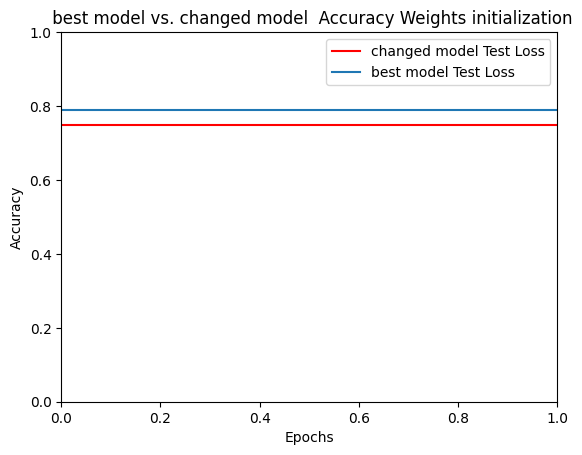

In [54]:
from torch.nn.modules.activation import ReLU
class NeuralNetwork_part2_best_model_weights_initialization(nn.Module):
    def __init__(self):
        super(NeuralNetwork_part2_best_model_weights_initialization, self).__init__()
        self.Linear_nn=nn.Sequential(
            nn.Linear(7, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 1),

        )

        self.apply(self.weights_initialize)

    def weights_initialize(self, m):

      if isinstance(m, nn.Linear):
        init.normal_(m.weight, mean = 0, std= 1e-2)
        init.constant_(m.bias, 0)

    def forward(self, x):
        x=self.Linear_nn(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the neural network
model_part2_best_model_weights_initialization = NeuralNetwork_part2_best_model_weights_initialization()

# Print the summary of the model
from torchinfo import summary
print(summary(model_part2_best_model_weights_initialization, input_size=(1, 7)))



#################### MODEL TRAINING ########################

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adagrad(model_part2_best_model_weights_initialization.parameters(), lr=0.002) # optimiser = Adagrad, learning rate = 0.002
train_losses_part2_best_model_weights_initialization = []
val_losses_part2_best_model_weights_initialization = []
train_pred_outside_epoch_part2_best_model_weights_initialization = []
train_true_outside_epoch_part2_best_model_weights_initialization = []
val_pred_outside_epoch_part2_best_model_weights_initialization = []
val_true_outside_epoch_part2_best_model_weights_initialization = []
train_accuracy_part2_best_model_weights_initialization = []
val_accuracy_part2_best_model_weights_initialization = []

# max_count = 10
# temp = 0
# min_val_loss = float('inf')

# scheduler = StepLR(optimizer, step_size=10, gamma=0.5)


# Training loop
start_time = time.time()
for epoch in range(20): # number of epochs = 20
    #Training step
    model_part2_best_model_weights_initialization.train()  # Set the model_part2_best_model_weights_initialization to training mode
    running_loss = 0.0
    train_pred_inside_epoch_part2_best_model_weights_initialization = []
    train_true_inside_epoch_part2_best_model_weights_initialization = []
    train_accuracy_inside_epoch_part2_best_model_weights_initialization = 0

    for i in range(0, len(X_train), 152):
        inputs = torch.FloatTensor(X_train[i:i+152])
        labels = torch.FloatTensor(y_train[i:i+152])

        optimizer.zero_grad()
        outputs = model_part2_best_model_weights_initialization(inputs)
        labels = labels.view(-1,1)
        loss = criterion(outputs, labels)
        train_predictions = (outputs >= 0.5).int()
        train_accuracy_inside_epoch_part2_best_model_weights_initialization = train_accuracy_inside_epoch_part2_best_model_weights_initialization + accuracy_score(labels, train_predictions)
        train_pred_inside_epoch_part2_best_model_weights_initialization = train_pred_inside_epoch_part2_best_model_weights_initialization + train_predictions.tolist()
        train_true_inside_epoch_part2_best_model_weights_initialization = train_true_inside_epoch_part2_best_model_weights_initialization + labels.tolist()
        loss.backward() # we are calculating gradients here
        optimizer.step() # Updating the weights

        running_loss += loss.item()

    train_loss = running_loss / len(X_train)
    train_losses_part2_best_model_weights_initialization.append(train_loss)

    train_pred_outside_epoch_part2_best_model_weights_initialization = train_pred_outside_epoch_part2_best_model_weights_initialization + train_pred_inside_epoch_part2_best_model_weights_initialization
    train_true_outside_epoch_part2_best_model_weights_initialization = train_true_outside_epoch_part2_best_model_weights_initialization + train_true_inside_epoch_part2_best_model_weights_initialization

    train_accuracy_part2_best_model_weights_initialization.append(train_accuracy_inside_epoch_part2_best_model_weights_initialization/4.0)

    val_pred_inside_epoch_part2_best_model_weights_initialization = []
    val_true_inside_epoch_part2_best_model_weights_initialization = []

    val_accuracy_inside_epoch_part2_best_model_weights_initialization = 0

    # Validationstep
    model_part2_best_model_weights_initialization.eval()  # Set the model_part2_best_model_weights_initialization to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(X_Validation), 19):
            inputs = torch.FloatTensor(X_Validation[i:i+19])
            labels = torch.FloatTensor(y_Validation[i:i+19])

            outputs = model_part2_best_model_weights_initialization(inputs)
            labels = labels.view(-1,1)
            loss = criterion(outputs, labels)

            val_predictions = (outputs >= 0.5).int()
            val_accuracy_inside_epoch_part2_best_model_weights_initialization = val_accuracy_inside_epoch_part2_best_model_weights_initialization + accuracy_score(labels,val_predictions)
            val_pred_inside_epoch_part2_best_model_weights_initialization = val_pred_inside_epoch_part2_best_model_weights_initialization + val_predictions.tolist()
            val_true_inside_epoch_part2_best_model_weights_initialization = val_true_inside_epoch_part2_best_model_weights_initialization + labels.tolist()
            val_loss += loss.item()

    val_loss /= len(X_Validation)
    val_losses_part2_best_model_weights_initialization.append(val_loss)

    val_pred_outside_epoch_part2_best_model_weights_initialization = val_pred_outside_epoch_part2_best_model_weights_initialization + val_pred_inside_epoch_part2_best_model_weights_initialization
    val_true_outside_epoch_part2_best_model_weights_initialization = val_true_outside_epoch_part2_best_model_weights_initialization + val_true_inside_epoch_part2_best_model_weights_initialization

    val_accuracy_part2_best_model_weights_initialization.append(val_accuracy_inside_epoch_part2_best_model_weights_initialization/4.0)

    # if val_loss < min_val_loss:
    #   min_val_loss = val_loss
    #   temp = 0
    # else:
    #   temp = temp + 1
    #   if temp >= max_count:
    #     print("breaking out from epochs to counter overfitting")
    #     break

    print(f'epoch : {epoch } out of 20 : Training Loss is {train_loss}, Validation Loss is {val_loss}, Training Accuracy : {train_accuracy_inside_epoch_part2_best_model_weights_initialization/4.0}, Validation Accuracy : {val_accuracy_inside_epoch_part2_best_model_weights_initialization/4.0} ')

end_time = time.time()

print(f"time taken for training on training and evaluation datasets : {end_time - start_time } ")

# print(f"Train_accuracy : {train_accuracy_part2_best_model_weights_initialization[0:10]}")
# print(f"Validation accuracy : {val_accuracy_part2_best_model_weights_initialization[0:10]}")

# print(f"{len(train_pred_outside_epoch_part2_best_model_weights_initialization)}")
# print(f"{len(train_true_outside_epoch_part2_best_model_weights_initialization)}")


#################### MODEL TESTING #############################


#Model evaluation on test dataset
test_start_time = time.time()
test_pred_outside_epoch_part2_best_model_weights_initialization = []
test_true_outside_epoch_part2_best_model_weights_initialization = []
test_loss = 0
model_part2_best_model_weights_initialization.eval()
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    test_labels = torch.FloatTensor(y_test)

    test_outputs = model_part2_best_model_weights_initialization(test_inputs)
    test_labels = test_labels.view(-1,1)
    loss = criterion(test_outputs, test_labels)
    test_loss = loss.item()
    print(f"loss during testing phase : {loss}")
    test_predictions = (test_outputs >= 0.5).int()
    test_pred_outside_epoch_part2_best_model_weights_initialization = test_pred_outside_epoch_part2_best_model_weights_initialization + test_predictions.tolist()
    test_true_outside_epoch_part2_best_model_weights_initialization = test_true_outside_epoch_part2_best_model_weights_initialization + test_labels.tolist()


test_end_time = time.time()
# Calculate metrics

accuracy_test_part2_best_model_weights_initialization = accuracy_score(y_test, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

print(f"Accuracy_test_part2_best_model_weights_initialization : {accuracy_test_part2_best_model_weights_initialization}")
print(f"Precision_test_part2_best_model_weights_initialization : {precision}")
print(f"recall_test_part2_best_model_weights_initialization : {recall}")
print(f"f1_test_part2_best_model_weights_initialization : {f1}")
print(f"time taken during testing dataset evaluation _test_part2_best_model_weights_initialization : {test_end_time  - test_start_time }")

##################### GRAPHS ##########################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy graph

epochs = range(1, len(train_accuracy_setup3_change3) + 1)
plt.axhline(y=accuracy_test_part2_best_model_weights_initialization ,color='r',label='changed model Test Loss')
plt.axhline(y=accuracy_test_setup1_change3,label='best model Test Loss')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(' best model vs. changed model  Accuracy Weights initialization')
plt.legend()
plt.show()



# #Confusion matrix for training dataset


# cm = confusion_matrix(train_true_outside_epoch_part2_best_model_weights_initialization, train_pred_outside_epoch_part2_best_model_weights_initialization)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for Validation dataset


# cm = confusion_matrix(val_true_outside_epoch_part2_best_model_weights_initialization, val_pred_outside_epoch_part2_best_model_weights_initialization)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Confusion matrix for testing dataset


# cm = confusion_matrix(test_true_outside_epoch_part2_best_model_weights_initialization, test_pred_outside_epoch_part2_best_model_weights_initialization)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, cmap="cool")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

# #Loss graph

# plt.figure(figsize=(10, 5))
# plt.plot(train_losses_part2_best_model_weights_initialization, label='Training Loss')
# plt.plot(val_losses_part2_best_model_weights_initialization, label='Validation Loss')
# plt.plot(test_loss, label='Test Loss')  # assuming you have this list
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training, Validation, and Test Loss')
# plt.legend()
# plt.show()




# # Accuracy graph
# epochs = range(1, len(train_accuracy_part2_best_model_weights_initialization) + 1)
# plt.plot(epochs, train_accuracy_part2_best_model_weights_initialization)
# plt.plot(epochs, val_accuracy_part2_best_model_weights_initialization)

# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training vs. Validation Accuracy')
# plt.legend()
# plt.show()

# # ROC Curve

# int_labels = torch.tensor(test_labels).to(torch.int64)
# metric = BinaryROC(thresholds=None)
# metric.update(torch.tensor(test_outputs), int_labels)
# fpr, tpr, thresholds = metric.compute()
# fig, ax = metric.plot(score=True)